In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

In [167]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

In [168]:
df = pd.read_csv("smartphones_missing_imputation_v2.csv")
df.head()

name  \
0                             Doogee S119   
1   Realme Narzo 80x 5G (8GB RAM + 128GB)   
2                               OnePlus 5   
3            Samsung Galaxy J2 Pro (2018)   
4  Xiaomi Redmi Note 10 (6GB RAM + 128GB)   

                                                                                link  \
0                         https://www.smartprix.com/mobiles/doogee-s119-ppd1061ooffo   
1   https://www.smartprix.com/mobiles/realme-narzo-80x-5g-8gb-ram-128gb-ppd1nqmx4rvo   
2                           https://www.smartprix.com/mobiles/oneplus-5-p1101pdglcaa   
3          https://www.smartprix.com/mobiles/samsung-galaxy-j2-pro-2018-p11017pj0y75   
4  https://www.smartprix.com/mobiles/xiaomi-redmi-note-10-6gb-ram-128gb-ppd1dr3e9y0a   

     price  rating  spec_score processor_brand processor_core  clock_speed  \
0  29999.0    4.40          89           helio           octa         2.00   
1  14499.0    4.05          80       dimensity           octa         2.50   
2  22999.0    4.40          74      snapdragon           octa         2.45   
3   7999.0    4.10          49      snapdragon           quad         1.40   
4  14999.0    4.50          78      snapdragon           octa         2.20   

   has_ir  has_nfc  has_5g  ram_gb  rom_gb    brand  battery_capacity_mah  \
0       0        1       0     8.0   512.0   Doogee               10200.0   
1       0        0       1     8.0   128.0   Realme                6000.0   
2       0        1       0     8.0   128.0  OnePlus                3300.0   
3       0        0       0     1.5    16.0  Samsung                2600.0   
4       1        0       0     6.0   128.0   Xiaomi                5000.0   

   fast_charging_watt  screen_size_inch  foldable_display  resolution_width  \
0                33.0              6.72                 0            1080.0   
1                45.0              6.72                 0            1080.0   
2                 0.0              5.50                 0            1080.0   
3                 0.0              5.00                 0             540.0   
4                33.0              6.43                 0            1080.0   

   resolution_height  display_refresh_rate     ppi  num_rear_cameras  \
0             2400.0                 120.0  391.64                 3   
1             2400.0                 120.0  391.64                 2   
2             1920.0                 120.0  400.53                 2   
3              960.0                  90.0  220.29                 1   
4             2400.0                 120.0  409.30                 4   

   num_front_cameras  rear_primary_mp  front_primary_mp  \
0                  1              100                16   
1                  1               50                 8   
2                  1               20                16   
3                  1                8                 5   
4                  1               48                13   

   expandable_memory_supported  expandable_memory_limit  price_group  \
0                            1                    512.0            7   
1                            1                   1024.0            3   
2                            0                      0.0            6   
3                            1                   1024.0            1   
4                            1                    512.0            4   

   battery_life_group  ram_gb_group   screen_type  
0                   2             3           LCD  
1                   2             3           LCD  
2                   0             3        AMOLED  
3                   0             0  SUPER AMOLED  
4                   2             2  SUPER AMOLED

In [169]:
# Price

<Axes: xlabel='price', ylabel='Density'>

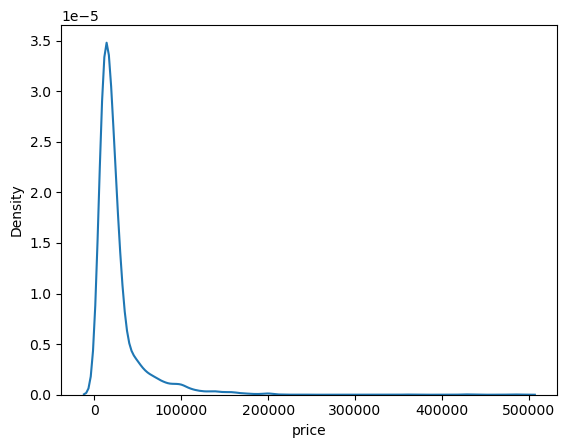

In [170]:
sns.kdeplot(df, x = 'price')

<Axes: xlabel='price'>

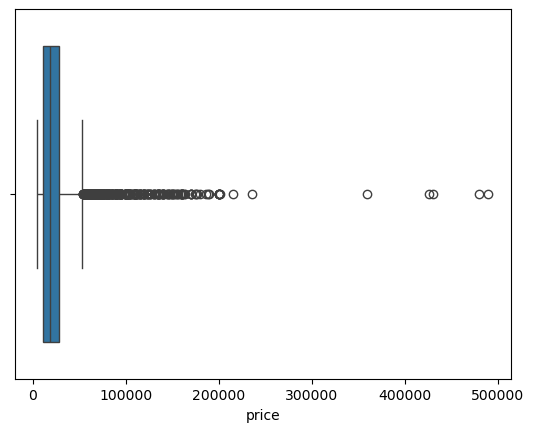

In [171]:
sns.boxplot(df, x = 'price')

In [172]:
df[df['price'] > 200000]

name  \
293                             Vertu Ironflip   
994                          Vertu Metavertu 2   
1243                      Lamborghini 88 Tauri   
1265                   Huawei Mate XT Ultimate   
2733          Huawei Mate 30 RS Porsche Design   
3368  Samsung Galaxy Z Fold 6 (12GB RAM + 1TB)   
3391                            Vertu Metaflip   
4213    Xiaomi Redmi K20 Pro Signature Edition   

                                                                                       link  \
293                           https://www.smartprix.com/mobiles/vertu-ironflip-ppd1afd66gbu   
994                        https://www.smartprix.com/mobiles/vertu-metavertu-2-ppd16wsx9jz5   
1243                    https://www.smartprix.com/mobiles/lamborghini-88-tauri-p1101kuyk9f5   
1265                 https://www.smartprix.com/mobiles/huawei-mate-xt-tri-fold-ppd1lewbpzx8   
2733        https://www.smartprix.com/mobiles/huawei-mate-30-rs-porsche-design-ppd13522ip1y   
3368    https://www.smartprix.com/mobiles/samsung-galaxy-z-fold-6-12gb-ram-1tb-ppd18lrhpa97   
3391                          https://www.smartprix.com/mobiles/vertu-metaflip-ppd17uqek8ch   
4213  https://www.smartprix.com/mobiles/xiaomi-redmi-k20-pro-signature-edition-ppd12yins6c1   

         price  rating  spec_score processor_brand processor_core  \
293   489990.0    4.45          86      snapdragon           octa   
994   425999.0    4.65          88      snapdragon           octa   
1243  360000.0    3.80          66      snapdragon           quad   
1265  235990.0    4.25          85           kirin           octa   
2733  214990.0    4.15          95           kirin           octa   
3368  200999.0    4.25          93      snapdragon           octa   
3391  429999.0    4.50          88      snapdragon           octa   
4213  480000.0    3.90          88      snapdragon           octa   

      clock_speed  has_ir  has_nfc  has_5g  ram_gb  rom_gb        brand  \
293      3.200000       0        1       1    12.0   256.0        Vertu   
994      3.200000       0        1       1    12.0   512.0        Vertu   
1243     2.300000       0        0       0     3.0    64.0  Lamborghini   
1265     2.464194       1        1       1    16.0   256.0       Huawei   
2733     2.860000       1        1       1    12.0   512.0       Huawei   
3368     3.390000       0        1       1    12.0  1024.0      Samsung   
3391     3.200000       0        1       1    12.0   512.0        Vertu   
4213     2.800000       0        1       0     8.0   256.0       Xiaomi   

      battery_capacity_mah  fast_charging_watt  screen_size_inch  \
293                 4310.0                65.0              6.70   
994                 5100.0                65.0              6.78   
1243                3400.0                 0.0              5.00   
1265                5600.0                66.0             10.20   
2733                4500.0                 0.0              6.53   
3368                4400.0                25.0              7.60   
3391                4500.0                65.0              6.78   
4213                4000.0                27.0              6.39   

      foldable_display  resolution_width  resolution_height  \
293                  0            2790.0             1188.0   
994                  0            1260.0             2800.0   
1243                 0            1080.0             1920.0   
1265                 1            2232.0             3184.0   
2733                 0            1176.0             2400.0   
3368                 1            1856.0             2160.0   
3391                 0            1188.0             2790.0   
4213                 0            1080.0             2340.0   

      display_refresh_rate     ppi  num_rear_cameras  num_front_cameras  \
293                  120.0  452.60                 2                  1   
994                  120.0  452.87                 3                  1   
1243                 120.0  440

In [173]:
# Removing the above outliers
df = df[df['price'] <= 200000]

<Axes: xlabel='price'>

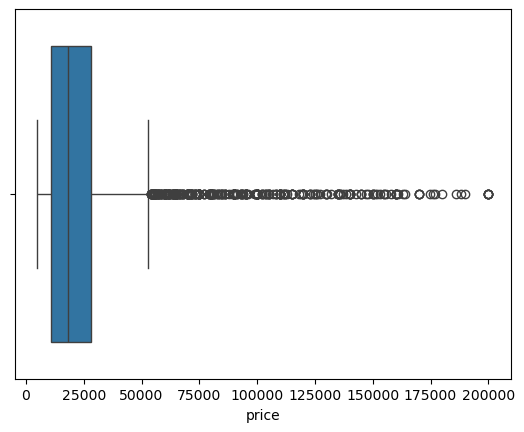

In [174]:
sns.boxplot(df, x = 'price')

In [175]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

df[(df['price'] < q1) | (df['price'] > q3)]

name  \
0                                               Doogee S119   
3                              Samsung Galaxy J2 Pro (2018)   
7                                     Samsung Galaxy A06 5G   
8                         Meizu 20 Infinity Unbound Edition   
9                             Motorola Moto G Turbo Edition   
10                                  Samsung Galaxy S25 Edge   
11                                        Motorola Moto G13   
12                                   Xiaomi Redmi 10A Sport   
13                                           Tesla Pi Phone   
14                                   Nubia Red Magic 7S Pro   
15                               Nubia Redmagic 8s Pro Plus   
16                                     Xiaomi Redmi 8A Dual   
18                           Vivo V40 5G (12GB RAM + 512GB)   
19                                           Doogee V30 Pro   
20                                 Poco C3 (4GB RAM + 64GB)   
30                                                iKall Z18   
31                Samsung Galaxy S23 Plus (8GB RAM + 512GB)   
32                                     Xiaomi Redmi A2 Plus   
33                                 Samsung Galaxy J2 (2018)   
34                                   Samsung Galaxy A5 Duos   
36                       Nothing Phone 2 (12GB RAM + 512GB)   
37                                            Hitech Air A7   
40                                          Vernee Mars Pro   
41                          Xiaomi Redmi 8 (4GB RAM + 64GB)   
42                                               Xiaomi 13T   
44                                                 iKall Z2   
45                            Honor 90 5G (12GB RAM +512GB)   
50                                           iKall K470 Pro   
51                                             Vivo S21 Pro   
52                                       Samsung Galaxy A76   
53                  Xiaomi Redmi 10 Prime (6GB RAM + 128GB)   
55                     Xiaomi Redmi A4 5G (4GB RAM + 128GB)   
56                                       Samsung Galaxy A03   
59                                       Lava Yuva 4 Pro 5G   
60                                     Spice Coolpad Mi-515   
61                          Huawei Honor 8C (4GB RAM +32GB)   
62                             Energizer Power Max P18K Pop   
64                  Samsung Galaxy A53 5G (8GB RAM + 128GB)   
67                                                Gionee K6   
72                                              Vivo V60 5G   
74                                             Itel A58 Pro   
78                                              Realme Fold   
80                                                Realme A1   
81                                     Motorola Moto G62 5G   
86                                     ZTE Axon 40 Ultra 5G   
87                                       Sharp Aquos R9 Pro   
90                                 Samsung Galaxy S20 Ultra   
93                               Nubia Red Magic 8 Pro Plus   
96                                                Vivo V28e   
97                                             Vivo V33 Pro   
99                                      Xiaomi Redmi 9C NFC   
102              Samsung Galaxy Z Fold 5 (12GB RAM + 512GB)   
105                                       Alcatel 1S (2021)   
106                                        Vivo V50 Lite 4G   
109                            Apple iPhone 14 Plus (512GB)   
111                                               HMD Hyper   
112                                           Huawei Nova 4   
113                                 Motorola Razr Plus 2025   
114                                                iKall S1   
116                                   Xiaomi Redmi Note 11S   
118                Samsung Galaxy A14 4G (4GB RAM + 128 GB)   
119                Google Pixel 9 Pro XL (16GB RAM + 512GB)   
120                                         Xiaomi Redmi A3   
121                    

In [176]:
df[df['price'] > q3]

name  \
0                                               Doogee S119   
8                         Meizu 20 Infinity Unbound Edition   
10                                  Samsung Galaxy S25 Edge   
13                                           Tesla Pi Phone   
14                                   Nubia Red Magic 7S Pro   
15                               Nubia Redmagic 8s Pro Plus   
18                           Vivo V40 5G (12GB RAM + 512GB)   
19                                           Doogee V30 Pro   
31                Samsung Galaxy S23 Plus (8GB RAM + 512GB)   
36                       Nothing Phone 2 (12GB RAM + 512GB)   
42                                               Xiaomi 13T   
45                            Honor 90 5G (12GB RAM +512GB)   
51                                             Vivo S21 Pro   
52                                       Samsung Galaxy A76   
62                             Energizer Power Max P18K Pop   
64                  Samsung Galaxy A53 5G (8GB RAM + 128GB)   
72                                              Vivo V60 5G   
78                                              Realme Fold   
86                                     ZTE Axon 40 Ultra 5G   
87                                       Sharp Aquos R9 Pro   
90                                 Samsung Galaxy S20 Ultra   
93                               Nubia Red Magic 8 Pro Plus   
96                                                Vivo V28e   
97                                             Vivo V33 Pro   
102              Samsung Galaxy Z Fold 5 (12GB RAM + 512GB)   
106                                        Vivo V50 Lite 4G   
109                            Apple iPhone 14 Plus (512GB)   
111                                               HMD Hyper   
112                                           Huawei Nova 4   
113                                 Motorola Razr Plus 2025   
119                Google Pixel 9 Pro XL (16GB RAM + 512GB)   
121                                           Nubia Flip 5G   
123                                       Honor Magic 7 Pro   
129                            OnePlus 11 5G Marble Odyssey   
130                                       Doogee V Max Plus   
134                                       Google Pixel Flip   
141                                            Oppo R17 Pro   
143                                      Nubia Red Magic 7S   
144                              Motorola Moto Edge X30 Pro   
152                                               Vivo X110   
163                                               Meizu 21x   
165                                   Samsung Galaxy S23 5G   
166                        Honor Magic 7 RSR Porsche Design   
167                                           OnePlus Ace 3   
168             Samsung Galaxy S25 Ultra (12GB RAM + 512GB)   
169                                     Lenovo Legion Pro 2   
170                             Apple iPhone 15 Pro (256GB)   
174                                      iQOO Neo 10 Pro 5G   
179                                  Motorola Razr 40 Ultra   
180          Samsung Galaxy S22 Ultra 5G (12GB RAM + 512GB)   
183                               OnePlus 10R Prime Edition   
186                         Xiaomi Redmi Note 13 Pro Max 5G   
191                                       Black Shark 7 Pro   
193                                           Vivo X Fold 5   
195                                          Honor 70 SE 5G   
212                                         Vivo X80 Pro 5G   
216                                    Huawei Pura 80 Ultra   
217                                      Sharp Aquos R8 Pro   
219                                           LG Stylo 7 5G   
225                                 Apple iPhone 16 (512GB)   
232                                           Vivo X110 Pro   
235                                   Motorola Moto X30 Pro   
236                                       Motorola Razr 50s   
239                    

In [177]:
# Above outliers are genuine outliers and they are large in number. So, I am gonna keep them.
# If I use linear models in future, then I'll apply log transformation to the price column.
# And in case of tree based models, this skewness is not a concern.

<Axes: ylabel='Density'>

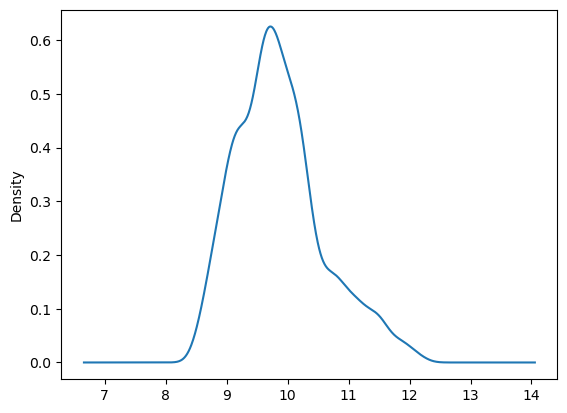

In [178]:
np.log1p(df['price']).plot(kind = 'kde')

In [179]:
np.log1p(df['price']).skew()

0.689510131579334

In [180]:
pt = PowerTransformer(method='yeo-johnson')
df['price_transformed'] = pt.fit_transform(df[['price']])
print(pd.Series(df['price_transformed']).skew())

0.03911379769568235


<Axes: ylabel='Density'>

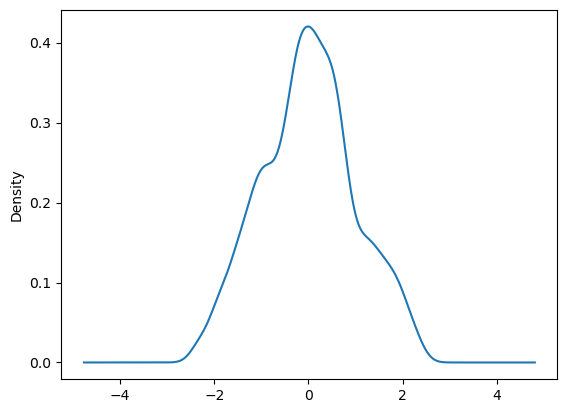

In [181]:
df['price_transformed'].plot(kind = 'kde')

In [182]:
# Battery

<Axes: xlabel='battery_capacity_mah'>

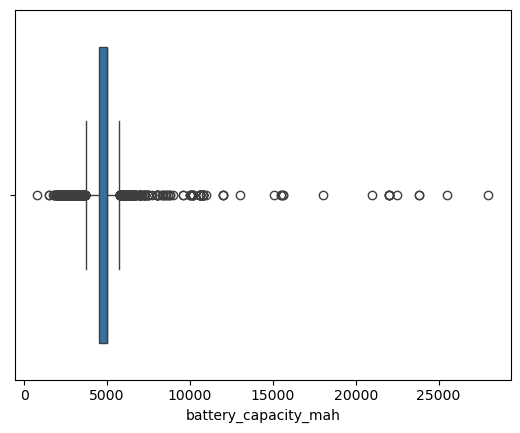

In [183]:
sns.boxplot(df, x = 'battery_capacity_mah')

In [184]:
df[df['battery_capacity_mah'] < 3000]

name  \
3                Samsung Galaxy J2 Pro (2018)   
9               Motorola Moto G Turbo Edition   
33                   Samsung Galaxy J2 (2018)   
34                     Samsung Galaxy A5 Duos   
37                              Hitech Air A7   
60                       Spice Coolpad Mi-515   
140                                   OPPO R1   
148                          Xiaomi Qin 2 Pro   
215                            Google Pixel 4   
218                                   TCL Fit   
223                 Sony Xperia C5 Ultra Dual   
298           Samsung Galaxy K zoom (S5 zoom)   
304              Samsung Galaxy Core Prime VE   
316                  Micromax Canvas 5 (32GB)   
317                                 OnePlus X   
318                             Nokia C1 Plus   
330                         Samsung Galaxy A7   
392                                  Nokia C2   
439                                   Vivo V1   
446                    Samsung Galaxy J1 Mini   
463                              LG K3 (2017)   
666                              CAT S22 Flip   
688                           OPPO Yoyo R2001   
751                  Samsung Galaxy J2 (2016)   
800                        Samsung Galaxy On5   
834                         Samsung Galaxy J2   
888                           Gionee ELIFE S7   
907                                  Vivo Y25   
952                            Sony Xperia XZ   
993                             Light Phone 3   
1017                      Sony Xperia R1 Plus   
1019                          Apple iPhone XR   
1073                 Samsung Galaxy S6 (64GB)   
1079             Samsung Galaxy J1 4G (J120G)   
1104                           Apple iPhone 9   
1143                           Sony Xperia ZL   
1220             Motorola Moto E (2nd Gen) 4G   
1244                       Intex Aqua Jewel 2   
1268                   Samsung Galaxy A2 Core   
1304                       Sony Xperia 8 Lite   
1308                                Samsung Z   
1375                           Apple iPhone X   
1387                        LG Nexus 5 (16GB)   
1424                   Motorola Moto Z2 Force   
1466                           HTC Desire 816   
1477                             Xiaomi Mi 2S   
1582                    Google Pixel 2 (64GB)   
1604                     Google Pixel (128GB)   
1613                  Samsung Galaxy J2 Prime   
1679                   BlackBerry Q20 Classic   
1706    Samsung Galaxy S3 I9300, S III (16GB)   
1732                        ZTE Small Fresh 5   
1752                                Neffos X1   
1768                   Sony Xperia Z1 Compact   
1776                                 OPPO A33   
1807                           Google Pixel 2   
1856                          Sony Xperia XZs   
1869                         Motorola Moto E3   
1933                       iBall Andi Wink 4G   
1935                          Apple iPhone 7s   
1950                              OPPO Find 5   
2004                                 Vivo Y28   
2023                   Acer Liquid Jade Primo   
2034             Asus Zenfone 5 A501CG (16GB)   
2069                 Samsung Galaxy A3 (2016)   
2080                    Samsung Galaxy Mega 2   
2090              Samsung Galaxy S4 Mini Plus   
2130             Samsung Galaxy J2 Pro (2019)   
2164                                  OPPO F1   
2253                              Vivo X Shot   
2362                                 OPPO R5s   
2419                              Lephone W11   
2489            Samsung Galaxy J2 Core (2020)   
2496                           Lenovo Vibe C2   
2549                                   LG K10   
2550                                    LG K5   
2568                       Motorola Razr 3 5G   
2612                     Apple iPhone 13 Mini   
2634                 Micromax Canvas Music M1   
2650                          Vkworld T2 Plus   
2707                Samsung Galaxy J1 Ace Neo   
2712  Micromax Canvas D

In [185]:
# Upon manually checking, it is found that almost all of the above phones are old ones. So, dropping them is a good idea as they have very less specifications to justify their price.
df = df[df['battery_capacity_mah'] >= 3000]

<Axes: xlabel='battery_capacity_mah'>

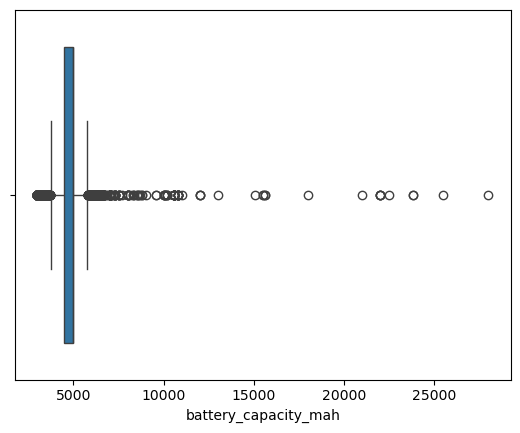

In [186]:
sns.boxplot(df, x = 'battery_capacity_mah')

<Axes: xlabel='battery_capacity_mah', ylabel='Density'>

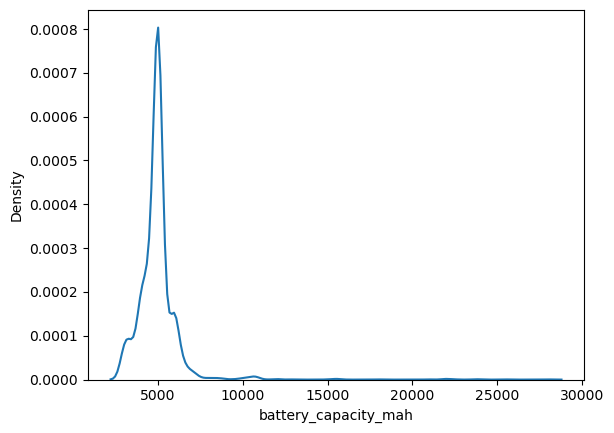

In [187]:
sns.kdeplot(df['battery_capacity_mah'])

In [188]:
df[df['battery_capacity_mah'] > 10000]

name  \
0                      Doogee S119   
19                  Doogee V30 Pro   
62    Energizer Power Max P18K Pop   
71                Doogee S200 Plus   
130              Doogee V Max Plus   
299                     Doogee S89   
371            Unihertz Tank 2 Pro   
497              Ulefone Armor 27T   
651               Cubot KingKong X   
756           Cubot KingKong X Pro   
793                   Oukitel WP36   
841               Cubot KingKong 8   
860         Ulefone Armor 28 Ultra   
978                   Oukitel WP23   
1142               Doogee S100 Pro   
1199         Ulefone Armor 27T Pro   
1286                  Doogee V31GT   
1334              Cubot KingKong 9   
1538                Doogee S89 Pro   
1580          Ulefone Armor 34 Pro   
1680        Unihertz Tank 3 Pro 5G   
1798                  Oukitel WP19   
1812             FOSSiBOT F101 PRO   
2124                  Doogee V Max   
2145        Ulefone Armor 26 Ultra   
2250              Doogee V Max Pro   
2369          Blackview BV9300 Pro   
2486                Energizer P28K   
2565          Blackview P10000 Pro   
2662             FOSSiBOT F106 Pro   
2823              Ulefone Armor 27   
2855              Oukitel WP32 Pro   
3051                  Doogee S200X   
3129                 Doogee S Punk   
3181               Unihertz Tank 2   
3466                   Doogee S110   
3506           Blackview Oscal S80   
3592             Doogee S Punk Pro   
3683                   Doogee S200   
3763                   Doogee S100   
3807           Doogee Fire 6 Power   
3808               Doogee S118 Pro   
4014           Cubot KingKong Star   
4040              Oukitel WP33 Pro   
4171               Oukitel WP15 5G   
4223                 FOSSiBOT F101   

                                                                             link  \
0                      https://www.smartprix.com/mobiles/doogee-s119-ppd1061ooffo   
19                  https://www.smartprix.com/mobiles/doogee-v30-pro-ppd1q9hgv2e4   
62    https://www.smartprix.com/mobiles/energizer-power-max-p18k-pop-ppd13h4qjz32   
71                https://www.smartprix.com/mobiles/doogee-s200-plus-ppd1p3p7a265   
130              https://www.smartprix.com/mobiles/doogee-v-max-plus-ppd1jngjzpcl   
299                     https://www.smartprix.com/mobiles/doogee-s89-ppd1e8p8blp5   
371            https://www.smartprix.com/mobiles/unihertz-tank-2-pro-ppd14hvzskdv   
497              https://www.smartprix.com/mobiles/ulefone-armor-27t-ppd1hzkoej82   
651               https://www.smartprix.com/mobiles/cubot-kingkong-x-ppd1skjqy2ia   
756           https://www.smartprix.com/mobiles/cubot-kingkong-x-pro-ppd1yrc091hh   
793                   https://www.smartprix.com/mobiles/oukitel-wp36-ppd113yaajvp   
841               https://www.smartprix.com/mobiles/cubot-kingkong-8-ppd12sip5t0a   
860         https://www.smartprix.com/mobiles/ulefone-armor-28-ultra-ppd12vkt0nal   
978                   https://www.smartprix.com/mobiles/oukitel-wp23-ppd17ipepjy6   
1142               https://www.smartprix.com/mobiles/doogee-s100-pro-ppd1cizdfyf6   
1199         https://www.smartprix.com/mobiles/ulefone-armor-27t-pro-ppd18p8ree0z   
1286                  https://www.smartprix.com/mobiles/doogee-v31gt-ppd1ab2gddak   
1334              https://www.smartprix.com/mobiles/cubot-kingkong-9-ppd13y41etqe   
1538                https://www.smartprix.com/mobiles/doogee-s89-pro-ppd1qd0tq7r4   
1580          https://www.smartprix.com/mobiles/ulefone-armor-34-pro-ppd1kn290l5c   
1680        https://www.smartprix.com/mobiles/unihertz-tank-3-pro-5g-ppd18rx5186q   
1798                  https://www.smartprix.com/mobiles/oukitel-wp19-ppd154zcofyu   
1812             https://www.smartprix.com/mobiles/fossibot-f101-pro-ppd16y4nhvt8   
2124                  https://www.smartprix.com/mobiles/doogee-v-max-ppd15202dfb0   
2145        https://www.smartprix.com/mobiles/ulefone-armor-26-ultra-ppd1vs2yf7z8   
2250              https://www.sma

<Axes: xlabel='battery_capacity_mah', ylabel='Density'>

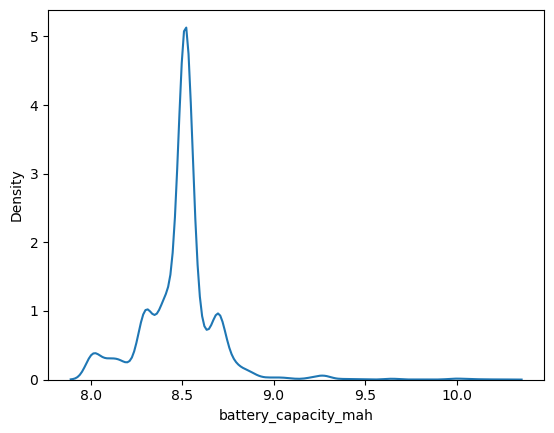

In [189]:
sns.kdeplot(np.log1p(df['battery_capacity_mah']))

In [190]:
np.log1p(df['battery_capacity_mah']).skew()

1.3854783863148277

In [191]:
pt = PowerTransformer(method='yeo-johnson')
df['battery_capacity_transformed'] = pt.fit_transform(df[['battery_capacity_mah']])
print(pd.Series(df['battery_capacity_transformed']).skew())

-0.18139191125015436


In [192]:
# These are genuine outliers supported by other great specifications too, so not going to remove them.
# Also, in case of linear models, we can apply some transformations like above to reduce the skewness.

In [193]:
# clock_speed

<Axes: xlabel='clock_speed'>

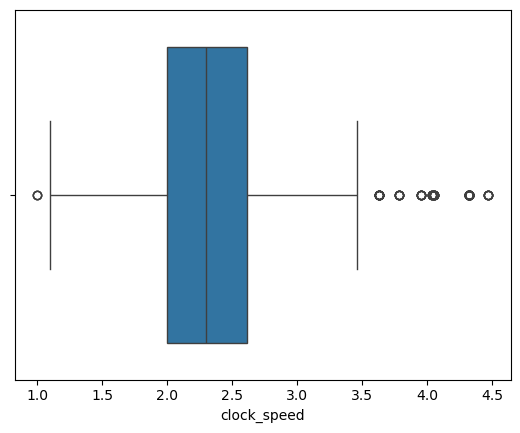

In [194]:
sns.boxplot(df['clock_speed'], orient = 'h')

In [195]:
df[df['clock_speed'] > 3.5]
# We can see that the below phones are genuine and this high clock speed is totally justified by the other specifications.

name  \
10                        Samsung Galaxy S25 Edge   
51                                   Vivo S21 Pro   
123                             Honor Magic 7 Pro   
166              Honor Magic 7 RSR Porsche Design   
168   Samsung Galaxy S25 Ultra (12GB RAM + 512GB)   
170                   Apple iPhone 15 Pro (256GB)   
174                            iQOO Neo 10 Pro 5G   
225                       Apple iPhone 16 (512GB)   
232                                 Vivo X110 Pro   
283                  OnePlus 13 (16GB RAM+ 512GB)   
348                               OnePlus 13 Mini   
351                            Vivo X300 Pro Mini   
482                         Apple iPhone 15 Ultra   
513                          Asus ROG Phone 9 Pro   
595                                   Oneplus 14R   
619                                     Xiaomi 15   
646                              Realme Neo 7 Pro   
719                              Apple iPhone 16e   
761                          Xiaomi Redmi K80 Pro   
779                                 Poco F7 Ultra   
941                           Apple iPhone 16 Pro   
1087                           Realme GT 7 Pro 5G   
1214             Nubia Z70 Ultra New Year Edition   
1336               Realme GT 7 Pro Racing Edition   
1400   Samsung Galaxy S25 Plus (12GB RAM + 512GB)   
1441                    Apple iPhone 16 Pro (1TB)   
1459                  Nubia Red Magic 10 Ultra 5G   
1507                     iQOO Neo 10S Pro Plus 5G   
1541                              Xiaomi 15 Ultra   
1597                    Apple iPhone 15 Pro (1TB)   
1645                             Asus ROG Phone 9   
1659                     Samsung Galaxy S25 Ultra   
1672                              Oppo Find X8 5G   
1751                        Asus Zenfone 12 Ultra   
1766                                  OnePlus 13T   
1787                      Apple iPhone 16 (256GB)   
1814           Oppo Find X8 5G (16GB RAM + 512GB)   
1853                                Xiaomi 15 Pro   
1854                  Apple iPhone 16 Pro (512GB)   
1886                  Apple iPhone 16 Pro (256GB)   
1888              Apple iPhone 16 Pro Max (512GB)   
1891                      Samsung Galaxy S25 Plus   
1981                    Nubia Red Magic 10 Pro 5G   
1982                                     Meizu 22   
2009                          Apple iPhone 15 Pro   
2042              Apple iPhone 15 Pro Max (512GB)   
2058                   OnePlus 13 (24GB RAM+ 1TB)   
2103                        Apple iPhone 16 Ultra   
2136                Apple iPhone 16 Pro Max (1TB)   
2168                              Vivo X200 Ultra   
2309                      Samsung Galaxy Z Flip 7   
2310                                   OnePlus 13   
2316                                Honor Magic 7   
2472                          Apple iPhone 17 Air   
2500                            Xiaomi Mix Flip 2   
2557                       Motorola Edge 60 Ultra   
2613                           Oppo Find X8 Ultra   
2677                               Vivo X200 Plus   
2812                             Vivo X200 Pro 5G   
2872                      Samsung Galaxy Z Fold 7   
2901                                Vivo X Fold 4   
2937                              Apple iPhone 16   
2943                           Vivo X200 Pro Mini   
2973                Apple iPhone 15 Pro Max (1TB)   
2984                              Nubia Z70 Ultra   
2993                           Oppo Find X8s Plus   
3014                  iQOO 13 5G (16GB RAM + 1TB)   
3044                            OnePlus Ace 5 Pro   
3095                  Apple iPhone 15 Pro (512GB)   
3130                      Apple iPhone 18 Pro Max   
3214                      Apple iPhone 16 Pro Max   
3230                              Apple iPhone 17   
3254               Nubia Red Magic 10 Pro Plus 5G   
3257        Samsung Galaxy S25 (12GB RAM + 128GB)   
3270                          Oppo Find X8 Pro 5G   
3293             

In [196]:
df[df['clock_speed'] < 1.2]

name  \
328     Motorola Moto E3 Power   
1895           Xiaomi Redmi 3X   
3462                  Nokia C9   
3627  Asus Zenfone Max ZC550KL   

                                                                         link  \
328     https://www.smartprix.com/mobiles/motorola-moto-e3-power-p1101fyvikc7   
1895           https://www.smartprix.com/mobiles/xiaomi-redmi-3x-p11011nxw2ae   
3462                  https://www.smartprix.com/mobiles/nokia-c9-p1101e4hghn4   
3627  https://www.smartprix.com/mobiles/asus-zenfone-max-zc550kl-p110148agyi3   

        price  rating  spec_score processor_brand processor_core  clock_speed  \
328    5749.0    3.85          51           helio           quad          1.0   
1895   8999.0    4.30          51      snapdragon           octa          1.1   
3462  13999.0    4.10          54      snapdragon           octa          1.0   
3627   7488.0    4.40          52      snapdragon           quad          1.0   

      has_ir  has_nfc  has_5g  ram_gb  rom_gb     brand  battery_capacity_mah  \
328        0        0       0     2.0    16.0  Motorola                3500.0   
1895       0        0       0     2.0    32.0    Xiaomi                4100.0   
3462       0        0       0     3.0    32.0     Nokia                4000.0   
3627       0        0       0     2.0    16.0      Asus                5000.0   

      fast_charging_watt  screen_size_inch  foldable_display  \
328                  0.0               5.0                 0   
1895                 0.0               5.0                 0   
3462                 0.0               5.0                 0   
3627                 0.0               5.5                 0   

      resolution_width  resolution_height  display_refresh_rate     ppi  \
328              720.0             1280.0                  90.0  293.72   
1895             720.0             1280.0                  90.0  293.72   
3462            1080.0             1920.0                  90.0  440.58   
3627             720.0             1280.0                  90.0  267.02   

      num_rear_cameras  num_front_cameras  rear_primary_mp  front_primary_mp  \
328                  1                  1                8                 5   
1895                 1                  1               13                 5   
3462                 1                  1               16                 5   
3627                 1                  1               13                 5   

      expandable_memory_supported  expandable_memory_limit  price_group  \
328                             1                     32.0            0   
1895                            1                    512.0            1   
3462                            1                    128.0            3   
3627                            1                     64.0            0   

      battery_life_group  ram_gb_group screen_type  price_transformed  \
328                    0             0         LCD          -2.033727   
1895                   0             0         LCD          -1.116825   
3462                   0             0         LCD          -0.345999   
3627                   2             0         LCD          -1.475228   

      battery_capacity_transformed  
328                      -1.804010  
1895                     -0.861238  
3462                     -1.002375  
3627                      0.198244

In [197]:
# Removing the above old phones
df = df[df['clock_speed'] >= 1.2]

<Axes: ylabel='Density'>

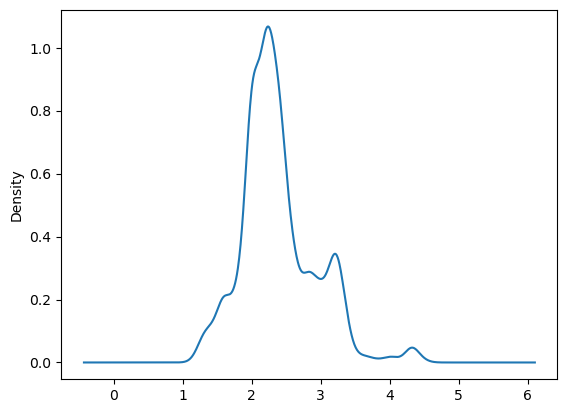

In [198]:
df['clock_speed'].plot(kind = 'kde')

In [199]:
df['clock_speed'].skew()

0.9010220247187118

In [200]:
np.log1p(df['clock_speed']).skew()

0.33104656143158995

In [201]:
# processor_brand

In [202]:
df['processor_brand'].value_counts()

processor_brand
snapdragon    1616
dimensity      955
helio          856
unisoc         239
exynos         185
bionic          59
kirin           56
tiger           56
mediatek        48
tensor          26
spreadtrum      15
hisilicon        3
arm              2
jlq              1
Name: count, dtype: int64

In [203]:
df[df['processor_brand'] == 'mediatek']['price'].mean()

8466.958333333334

In [204]:
df[df['processor_brand'] == 'dimensity']['price'].mean()

24791.00732984293

In [205]:
df[df['processor_brand'] == 'helio']['price'].mean()

12735.202102803738

In [206]:
# 'Mediatek', 'helio' and 'dimensity' are basically one company, so it seems a logical step to merge them.
# But, above it can also be observed that these three brands represent phones of different price range.
# So, keeping them separated.
# But, merging thise processor brand as 'others' which have low frequency.

In [207]:
# hisilicon and kirin are same company. So, merging them.
df.loc[df['processor_brand'] == 'hisilicon', 'processor_brand'] = "kirin"

In [208]:
# Merging 'spreadtrum', 'arm' and 'jlq' into one group and calling them as 'other'
df.loc[(df['processor_brand'] == 'jlq') | (df['processor_brand'] == 'spreadtrum') | (df['processor_brand'] == 'arm'), 'processor_brand'] = 'other'

In [209]:
df['has_ir'].value_counts()

has_ir
0    3342
1     775
Name: count, dtype: int64

In [210]:
df['has_nfc'].value_counts()

has_nfc
0    2461
1    1656
Name: count, dtype: int64

In [211]:
df['has_5g'].value_counts()

has_5g
1    2203
0    1914
Name: count, dtype: int64

In [212]:
# RAM

In [213]:
df['ram_gb'].value_counts().sort_values(ascending = False)

ram_gb
8.0     1356
4.0      937
6.0      770
12.0     553
3.0      230
2.0      157
16.0      79
1.0       20
24.0       9
18.0       4
1.5        1
10.0       1
Name: count, dtype: int64

In [214]:
df[df['ram_gb'] > 20]

name  \
1376                                Realme GT 5 (240W)   
2058                        OnePlus 13 (24GB RAM+ 1TB)   
2293                      Honor 90 GT (24GB RAM + 1TB)   
3029       Nubia Red Magic 9 Pro Plus (24GB RAM + 1TB)   
3312  Xiaomi Redmi K70 Extreme Edition (24GB RAM +1TB)   
3405                      Asus ROG Phone 9 Pro Edition   
3547                OnePlus Ace 3 Pro (24GB RAM + 1TB)   
3643                                 Honor Magic 6 RSR   
3713                OnePlus Ace 2 Pro (24GB RAM + 1TB)   

                                                                                          link  \
1376                           https://www.smartprix.com/mobiles/realme-gt-5-240w-ppd1hjaiyy6z   
2058                        https://www.smartprix.com/mobiles/oneplus-13-24gb-ram-ppd1dsj15khx   
2293                   https://www.smartprix.com/mobiles/honor-90-gt-24gb-ram-1tb-ppd12fh397ka   
3029    https://www.smartprix.com/mobiles/nubia-red-magic-9-pro-plus-24gb-ram-1tb-ppd1oxu25ish   
3312  https://www.smartprix.com/mobiles/xiaomi-redmi-k70-extreme-edition-24gb-ram-ppd12rr4mb55   
3405               https://www.smartprix.com/mobiles/asus-rog-phone-9-pro-edition-ppd1wqhb1pbz   
3547             https://www.smartprix.com/mobiles/oneplus-ace-3-pro-24gb-ram-1tb-ppd13ejxdbvj   
3643                          https://www.smartprix.com/mobiles/honor-magic-6-rsr-ppd1ypc9cv01   
3713             https://www.smartprix.com/mobiles/oneplus-ace-2-pro-24gb-ram-1tb-ppd112uyibpa   

         price  rating  spec_score processor_brand processor_core  \
1376   42990.0    4.15          89      snapdragon           octa   
2058   89998.0    4.35          95      snapdragon           octa   
2293   43990.0    4.25          87      snapdragon           octa   
3029   80990.0    4.25          90      snapdragon           octa   
3312   47990.0    4.35          89       dimensity           octa   
3405  126990.0    4.30          95      snapdragon           octa   
3547   53990.0    4.60          89      snapdragon           octa   
3643  114990.0    4.70          98      snapdragon           octa   
3713   49990.0    4.00          89      snapdragon           octa   

      clock_speed  has_ir  has_nfc  has_5g  ram_gb  rom_gb    brand  \
1376         3.20       1        1       1    24.0  1024.0   Realme   
2058         4.32       1        1       1    24.0  1024.0  OnePlus   
2293         3.20       1        1       1    24.0  1024.0    Honor   
3029         3.30       0        1       1    24.0  1024.0    Nubia   
3312         3.25       1        1       1    24.0  1024.0   Xiaomi   
3405         4.32       0        1       1    24.0  1024.0     Asus   
3547         3.30       1        1       1    24.0  1024.0  OnePlus   
3643         3.30       1        1       1    24.0  1024.0    Honor   
3713         3.20       1        1       1    24.0  1024.0  OnePlus   

      battery_capacity_mah  fast_charging_watt  screen_size_inch  \
1376                4600.0               240.0              6.74   
2058                6000.0               100.0              6.82   
2293                5000.0               100.0              6.70   
3029                5500.0               165.0              6.80   
3312                5500.0               120.0              6.67   
3405                5800.0                65.0              6.78   
3547                6100.0               100.0              6.78   
3643                5600.0                80.0              6.80   
3713                5000.0               150.0              6.74   

      foldable_display  resolution_width  resolution_height  \
1376                 0            1240.0             2772.0   
2058                 0            1440.0             3168.0   
2293                 0            1200.0             2664.0   
3029                 0            1116.0             2480.0   
3312                 0            1220.0             2712.0   
3405                 0     

In [215]:
df['ram_gb'].skew()

0.9212642576502653

In [216]:
np.log1p(df['ram_gb']).skew()

-0.23025254944670842

In [217]:
# All the above outliers are genuine and can be transformed to reduce skewness. So keeping them.

In [218]:
# rom_gb

In [219]:
df['rom_gb'].value_counts()

rom_gb
128.0     1804
256.0     1022
64.0       714
32.0       299
512.0      165
16.0        77
1024.0      28
8.0          5
4.0          1
12.0         1
258.0        1
Name: count, dtype: int64

In [220]:
df[df['rom_gb'] <= 10]

name  \
1445                      itel A26   
1542          Philips Xenium W6610   
2229               Xiaomi Redmi Go   
2730               Huawei Honor 4X   
2773  Lenovo Golden Warrior Note 8   
3614                   Lenovo S930   

                                                                             link  \
1445                      https://www.smartprix.com/mobiles/itel-a26-ppd18wx62qlf   
1542          https://www.smartprix.com/mobiles/philips-xenium-w6610-p1101ykj1ac9   
2229               https://www.smartprix.com/mobiles/xiaomi-redmi-go-ppd1o8110pvg   
2730               https://www.smartprix.com/mobiles/huawei-honor-4x-p1101liymzz6   
2773  https://www.smartprix.com/mobiles/lenovo-golden-warrior-note-8-p1101i5awb4t   
3614                   https://www.smartprix.com/mobiles/lenovo-s930-p1101vkvlkxx   

        price  rating  spec_score processor_brand processor_core  clock_speed  \
1445   5090.0    4.35          48           other           quad          1.4   
1542   5500.0    4.25          42           helio           quad          1.3   
2229   4999.0    4.15          46      snapdragon           quad          1.4   
2730   7500.0    4.30          50      snapdragon           quad          1.2   
2773  12000.0    4.10          49           helio           octa          1.7   
3614   9999.0    4.35          48           helio           quad          1.3   

      has_ir  has_nfc  has_5g  ram_gb  rom_gb    brand  battery_capacity_mah  \
1445       0        0       0     1.0     8.0     Itel                3000.0   
1542       0        0       0     1.0     4.0  Philips                5300.0   
2229       0        0       0     1.0     8.0   Xiaomi                3000.0   
2730       0        0       0     2.0     8.0   Huawei                3000.0   
2773       0        0       0     1.0     8.0   Lenovo                3300.0   
3614       0        0       0     1.0     8.0   Lenovo                3000.0   

      fast_charging_watt  screen_size_inch  foldable_display  \
1445                 0.0               6.1                 0   
1542                 0.0               5.0                 0   
2229                 0.0               5.0                 0   
2730                 0.0               5.5                 0   
2773                 0.0               6.0                 0   
3614                 0.0               6.0                 0   

      resolution_width  resolution_height  display_refresh_rate     ppi  \
1445             720.0             1520.0                  90.0  275.72   
1542             960.0              540.0                  90.0  220.29   
2229             720.0             1280.0                  90.0  293.72   
2730             720.0             1280.0                  90.0  267.02   
2773             720.0             1280.0                  90.0  244.77   
3614             720.0             1280.0                  90.0  244.77   

      num_rear_cameras  num_front_cameras  rear_primary_mp  front_primary_mp  \
1445                 1                  1                5                 5   
1542                 1                  1                8                 2   
2229                 1                  1                8                 5   
2730                 1                  1               13                 5   
2773                 1                  1               13                 5   
3614                 1                  1                8                 6   

      expandable_memory_supported  expandable_memory_limit  price_group  \
1445                            1                   1024.0            0   
1542                            1                     32.0            0   
2229                            1                    128.0            0   
2730                            1                     32.0            0   
2773                            1                     32.0            2   
3614                            1                   

In [221]:
# Most of the above phones are old and their price is not justifiable by their specs. So, removing them.
df = df[df['rom_gb'] >= 10]

In [222]:
df['rom_gb'].value_counts()

rom_gb
128.0     1804
256.0     1022
64.0       714
32.0       299
512.0      165
16.0        77
1024.0      28
12.0         1
258.0        1
Name: count, dtype: int64

In [223]:
# Removing the phones with rom = 12 and rom  = 258
df = df[(~df['rom_gb'].isin([12, 258]))]

In [224]:
df['rom_gb'].value_counts()

rom_gb
128.0     1804
256.0     1022
64.0       714
32.0       299
512.0      165
16.0        77
1024.0      28
Name: count, dtype: int64

In [225]:
# brand

In [226]:
df['brand'].value_counts()

brand
Vivo          452
Realme        436
Samsung       434
Xiaomi        377
Oppo          308
Motorola      216
Tecno         159
Infinix       137
Honor         133
OnePlus       131
Poco          131
Iqoo          125
Huawei         89
Lava           66
Nokia          65
Apple          59
Itel           58
ZTE            49
Doogee         47
Nubia          46
iKall          45
TCL            41
Google         35
Oukitel        28
Ulefone        28
HMD            27
LG             26
Asus           26
Sony           24
Nothing        24
Blackview      20
HTC            19
Meizu          17
Cubot          16
Lenovo         16
Coolpad        15
Blu            14
Gionee         12
Sharp          11
Micromax       11
Wiko            8
Black           8
Acer            7
Energizer       7
Hisense         7
Umidigi         6
Unihertz        5
Blackberry      5
CMF             4
Cat             4
Alcatel         4
FOSSiBOT        3
Jio             3
Leitz           3
Jovi            3
Phil

In [227]:
# Clubbing all brands which have less than 10 phones in the dataset and labelling them as "Others"

In [228]:
unique_brands_freq = df['brand'].value_counts()

In [229]:
less_frequent_brands = unique_brands_freq[unique_brands_freq < 10].index

In [230]:
df['brand'] = df['brand'].apply(lambda x: "Others" if x in less_frequent_brands else x)

In [231]:
df.shape

(4109, 34)

In [232]:
 df['brand'].value_counts()

brand
Vivo         452
Realme       436
Samsung      434
Xiaomi       377
Oppo         308
Motorola     216
Tecno        159
Infinix      137
Others       136
Honor        133
OnePlus      131
Poco         131
Iqoo         125
Huawei        89
Lava          66
Nokia         65
Apple         59
Itel          58
ZTE           49
Doogee        47
Nubia         46
iKall         45
TCL           41
Google        35
Ulefone       28
Oukitel       28
HMD           27
Asus          26
LG            26
Sony          24
Nothing       24
Blackview     20
HTC           19
Meizu         17
Lenovo        16
Cubot         16
Coolpad       15
Blu           14
Gionee        12
Sharp         11
Micromax      11
Name: count, dtype: int64

In [233]:
# fast_charging_watt

In [234]:
df['fast_charging_watt'].value_counts()

fast_charging_watt
0.0      1003
18.0      491
33.0      440
80.0      215
45.0      197
25.0      191
67.0      177
15.0      163
10.0      158
120.0     140
30.0      130
44.0      129
100.0     124
66.0       96
65.0       71
5.0        63
20.0       50
90.0       48
68.0       35
150.0      30
50.0       24
35.0       22
40.0       19
70.0       14
125.0      10
200.0       9
55.0        7
60.0        7
27.0        7
165.0       6
240.0       4
88.0        4
37.0        3
24.0        3
210.0       2
180.0       2
250.0       2
2.0         2
23.0        2
135.0       1
57.0        1
36.0        1
320.0       1
14.0        1
3.0         1
260.0       1
21.0        1
19.0        1
Name: count, dtype: int64

<Axes: xlabel='fast_charging_watt'>

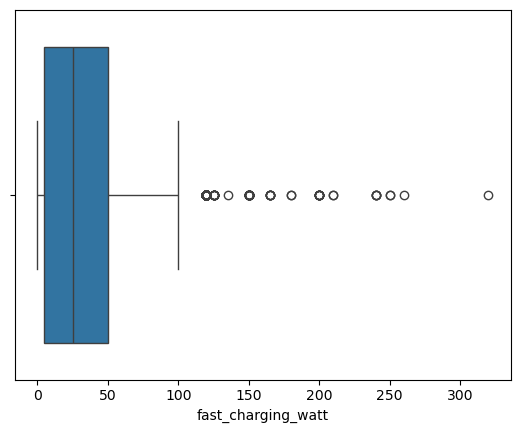

In [235]:
sns.boxplot(df, x = 'fast_charging_watt')

In [236]:
df[df['fast_charging_watt'] > 100].shape

(208, 34)

In [237]:
df[df['fast_charging_watt'] > 150].shape

(27, 34)

In [238]:
df[df['fast_charging_watt'] > 150]

name  \
15                     Nubia Redmagic 8s Pro Plus   
93                     Nubia Red Magic 8 Pro Plus   
152                                     Vivo X110   
191                             Black Shark 7 Pro   
232                                 Vivo X110 Pro   
1031                                  iQOO 13 Pro   
1101                        Blackview Shark 8 Pro   
1136                           Vivo X110 Pro Plus   
1376                           Realme GT 5 (240W)   
1459                  Nubia Red Magic 10 Ultra 5G   
1532                Nubia Red Magic 9 Pro Plus 5G   
1553                        Nubia Redmagic 8s Pro   
1690                                  Realme GT 8   
1845                                  Realme GT 4   
1863                                  Realme GT 3   
2494                           Infinix Zero Ultra   
2602                Xiaomi Redmi Note 15 Pro Plus   
2742                               OnePlus 13 Pro   
3029  Nubia Red Magic 9 Pro Plus (24GB RAM + 1TB)   
3213                              Realme GT 8 Pro   
3404              Xiaomi Redmi Note 12 Pro Max 5G   
3412                  Nubia Red Magic 9s Pro Plus   
3587       Xiaomi Redmi Note 12 Discovery Edition   
3638                       Infinix GT 10 Pro Plus   
3692                                     iQOO 11s   
4147                       Realme GT Neo 5 (240W)   
4198                               iQOO 10 Pro 5G   

                                                                                        link  \
15                 https://www.smartprix.com/mobiles/nubia-redmagic-8s-pro-plus-ppd19yqgaahv   
93                 https://www.smartprix.com/mobiles/nubia-red-magic-8-pro-plus-ppd1q44lbq8c   
152                                 https://www.smartprix.com/mobiles/vivo-x110-ppd153y4sfz7   
191                         https://www.smartprix.com/mobiles/black-shark-7-pro-ppd1t7znmppq   
232                             https://www.smartprix.com/mobiles/vivo-x110-pro-ppd1dw07pb4c   
1031                              https://www.smartprix.com/mobiles/iqoo-13-pro-ppd1an3e0ecq   
1101                    https://www.smartprix.com/mobiles/blackview-shark-8-pro-ppd10180ez60   
1136                       https://www.smartprix.com/mobiles/vivo-x110-pro-plus-ppd1e3xz8uee   
1376                         https://www.smartprix.com/mobiles/realme-gt-5-240w-ppd1hjaiyy6z   
1459              https://www.smartprix.com/mobiles/nubia-red-magic-10-ultra-5g-ppd1oy8e7zrx   
1532            https://www.smartprix.com/mobiles/nubia-red-magic-9-pro-plus-5g-ppd18wsslesn   
1553                    https://www.smartprix.com/mobiles/nubia-redmagic-8s-pro-ppd1la5yutty   
1690                              https://www.smartprix.com/mobiles/realme-gt-8-ppd1lvgk6xo0   
1845                              https://www.smartprix.com/mobiles/realme-gt-4-ppd1mkbutgsj   
1863                              https://www.smartprix.com/mobiles/realme-gt-3-ppd1br3t62k3   
2494                       https://www.smartprix.com/mobiles/infinix-zero-ultra-ppd1kjos0aij   
2602            https://www.smartprix.com/mobiles/xiaomi-redmi-note-15-pro-plus-ppd1jvtym23z   
2742                           https://www.smartprix.com/mobiles/oneplus-13-pro-ppd1a332t0zn   
3029  https://www.smartprix.com/mobiles/nubia-red-magic-9-pro-plus-24gb-ram-1tb-ppd1oxu25ish   
3213                          https://www.smartprix.com/mobiles/realme-gt-8-pro-ppd131nedv41   
3404          https://www.smartprix.com/mobiles/xiaomi-redmi-note-12-pro-max-5g-ppd1bq4fvz5k   
3412              https://www.smartprix.com/mobiles/nubia-red-magic-9s-pro-plus-ppd12edm71gv   
3587   https://www.smartprix.com/mobiles/xiaomi-redmi-note-12-discovery-edition-ppd1ddpn9keq   
3638                   https://www.smartprix.com/mobiles/infinix-gt-10-pro-plus-ppd1ygtbj5w0   
3692                                 https://www.smartprix.com/mobiles/iqoo-11s-ppd1gvv7tqjx   
4147                     https://www.smartprix.com/mobiles/realm

<Axes: ylabel='Density'>

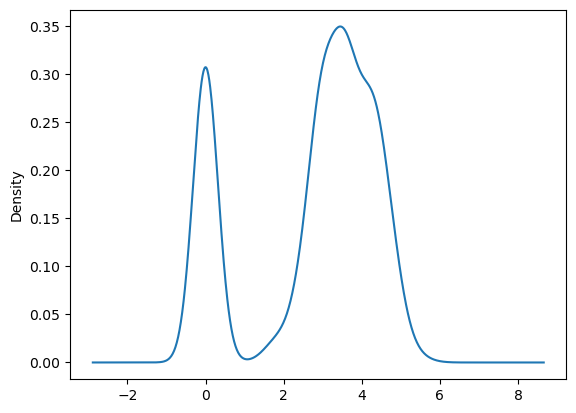

In [239]:
np.log1p(df['fast_charging_watt']).plot(kind = 'kde')

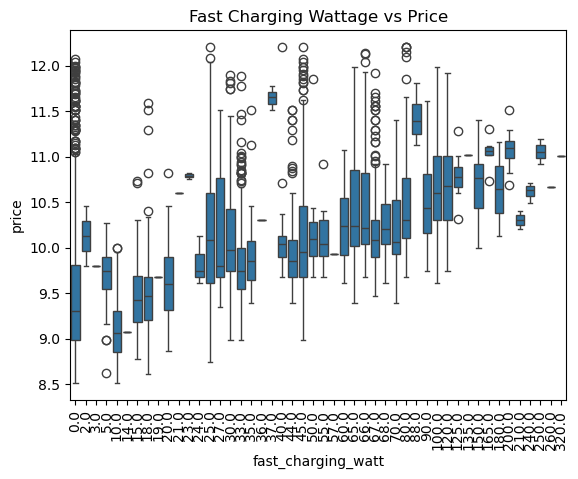

In [240]:
sns.boxplot(x=df['fast_charging_watt'], y=np.log1p(df['price']))
plt.xticks(rotation=90)
plt.title('Fast Charging Wattage vs Price')
plt.show()

In [241]:
# We can see that there is generally upward trend between fast_charging_watt and log_transformed_price.
# So, in case of tree based models, we will treat it as numerical column but in case of linear models, we will use it as categorical column.
# Also, outliers are genuine. So, keeping them. Here also, we can apply transformations to reduce skewness.

In [242]:
df.columns

Index(['name', 'link', 'price', 'rating', 'spec_score', 'processor_brand',
       'processor_core', 'clock_speed', 'has_ir', 'has_nfc', 'has_5g',
       'ram_gb', 'rom_gb', 'brand', 'battery_capacity_mah',
       'fast_charging_watt', 'screen_size_inch', 'foldable_display',
       'resolution_width', 'resolution_height', 'display_refresh_rate', 'ppi',
       'num_rear_cameras', 'num_front_cameras', 'rear_primary_mp',
       'front_primary_mp', 'expandable_memory_supported',
       'expandable_memory_limit', 'price_group', 'battery_life_group',
       'ram_gb_group', 'screen_type', 'price_transformed',
       'battery_capacity_transformed'],
      dtype='object')

In [243]:
df['screen_size_inch'].value_counts()

screen_size_inch
6.67      440
6.50      365
6.70      339
6.78      330
6.60      246
6.56      163
6.80      139
6.40      121
6.52      115
6.74      106
6.58      104
6.72       92
5.50       91
6.82       86
6.53       85
6.43       83
6.51       82
6.30       80
6.55       61
6.44       58
6.10       56
6.00       49
6.20       41
6.90       39
6.77       36
6.79       30
5.70       28
6.59       27
6.73       25
6.64       25
6.22       24
6.62       24
6.71       24
5.00       23
6.75       23
6.38       22
6.26       21
5.99       20
5.45       20
6.88       20
6.68       18
6.83       17
5.20       15
6.57       14
6.95       13
6.39       11
6.35       10
7.60        9
6.81        9
6.41        7
5.90        7
6.85        7
6.47        7
6.21        7
6.28        6
6.45        6
7.92        6
8.00        6
6.01        5
6.49        5
5.60        5
5.30        5
6.65        5
7.80        5
5.93        5
6.36        5
8.03        5
6.31        4
6.84        4
7.85        4
6.6

In [244]:
df[df['screen_size_inch'] == 720]

name  \
2397  Honor Play 30 Plus 5G   

                                                                      link  \
2397  https://www.smartprix.com/mobiles/honor-play-30-plus-5g-ppd1jik7jq2g   

        price  rating  spec_score processor_brand processor_core  clock_speed  \
2397  12990.0     4.2          62       dimensity           octa          2.2   

      has_ir  has_nfc  has_5g  ram_gb  rom_gb  brand  battery_capacity_mah  \
2397       0        0       1     4.0   128.0  Honor                5000.0   

      fast_charging_watt  screen_size_inch  foldable_display  \
2397                 5.0             720.0                 0   

      resolution_width  resolution_height  display_refresh_rate   ppi  \
2397             720.0             1600.0                  90.0  2.44   

      num_rear_cameras  num_front_cameras  rear_primary_mp  front_primary_mp  \
2397                 2                  1               13                 5   

      expandable_memory_supported  expandable_memory_limit  price_group  \
2397                            1                    512.0            3   

      battery_life_group  ram_gb_group screen_type  price_transformed  \
2397                   2             1         LCD          -0.468059   

      battery_capacity_transformed  
2397                      0.198244

In [245]:
# Above row has data error in screen_size_inch. So correcting it.
df.loc[2397, 'screen_size_inch'] = 6.74

<Axes: ylabel='Density'>

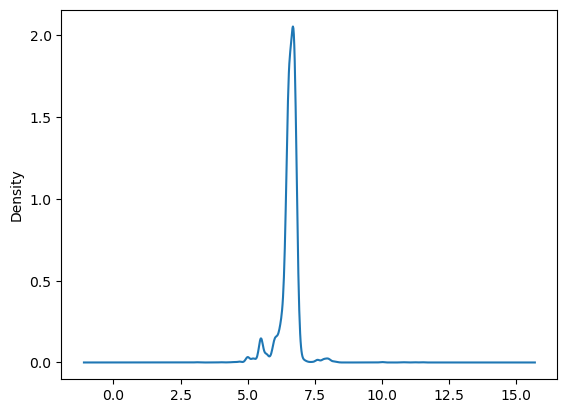

In [246]:
df['screen_size_inch'].plot(kind = 'kde')

<Axes: xlabel='screen_size_inch'>

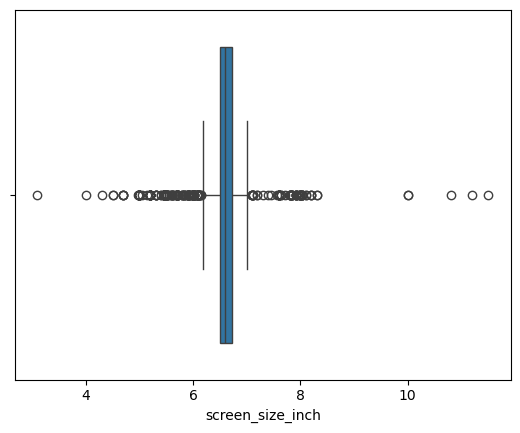

In [247]:
sns.boxplot(df, x = 'screen_size_inch')

In [248]:
df[df['screen_size_inch'] > 9]

name  \
362                      Xiaomi Trifold   
569                         TCL Trifold   
1154  Tecno Phantom Ultimate 2 Tri Fold   
3588                Oppo Tri Fold Phone   
3835    Samsung Galaxy G Tri Fold Phone   

                                                                                  link  \
362                      https://www.smartprix.com/mobiles/xiaomi-trifold-ppd1316h9q1n   
569                         https://www.smartprix.com/mobiles/tcl-trifold-ppd13adk1xlz   
1154  https://www.smartprix.com/mobiles/tecno-phantom-ultimate-2-tri-fold-ppd1v4u0jecw   
3588                      https://www.smartprix.com/mobiles/oppo-tri-fold-ppd146h2hmho   
3835            https://www.smartprix.com/mobiles/samsung-galaxy-tri-fold-ppd10xmk6inv   

         price  rating  spec_score processor_brand processor_core  \
362   189990.0    4.30          89      snapdragon           octa   
569   119990.0    4.65          93      snapdragon           octa   
1154  129990.0    4.30          86       dimensity           octa   
3588  199990.0    4.65          88      snapdragon           octa   
3835  199990.0    4.40          85      snapdragon           octa   

      clock_speed  has_ir  has_nfc  has_5g  ram_gb  rom_gb    brand  \
362      2.813256       1        1       1    12.0   512.0   Xiaomi   
569      3.200000       0        1       1    12.0   256.0      TCL   
1154     2.443125       1        1       1    12.0   256.0    Tecno   
3588     2.537246       1        1       1    12.0   512.0     Oppo   
3835     2.837037       1        1       1    12.0   256.0  Samsung   

      battery_capacity_mah  fast_charging_watt  screen_size_inch  \
362                 6500.0                80.0              11.5   
569                 4600.0                67.0              10.0   
1154                6500.0               100.0              10.0   
3588                6000.0                80.0              11.2   
3835                5700.0                45.0              10.8   

      foldable_display  resolution_width  resolution_height  \
362                  1            2780.0             3200.0   
569                  1            1916.0             2160.0   
1154                 1            2780.0             3200.0   
3588                 1            2232.0             3184.0   
3835                 1            2232.0             3184.0   

      display_refresh_rate     ppi  num_rear_cameras  num_front_cameras  \
362                  120.0  368.60                 3                  2   
569                  120.0  288.73                 3                  1   
1154                 120.0  423.89                 3                  2   
3588                 120.0  347.18                 4                  1   
3835                 120.0  360.04                 3                  1   

      rear_primary_mp  front_primary_mp  expandable_memory_supported  \
362                50                32                            0   
569                50                32                            0   
1154               50                32                            0   
3588               50                50                            0   
3835               50                12                            0   

      expandable_memory_limit  price_group  battery_life_group  ram_gb_group  \
362                       0.0            9                   2             3   
569                       0.0            9                   1             3   
1154                      0.0            9                   2             3   
3588                      0.0            9                   2             3   
3835                      0.0            9                   2             3   

     screen_type  price_transformed  battery_capacity_transformed  
362       AMOLED           2.381204                      1.413852  
569       AMOLED           2.065556                     -0.231161  
1154      AMOLED           2.124345 

In [249]:
df[df['foldable_display'] == 1]['screen_size_inch'].mean()

7.446548672566372

In [250]:
# Removing the above outliers even though they are genuine but the are very less in number.
df = df[df['screen_size_inch'] <= 9]

In [251]:
df.shape

(4104, 34)

<Axes: xlabel='screen_size_inch'>

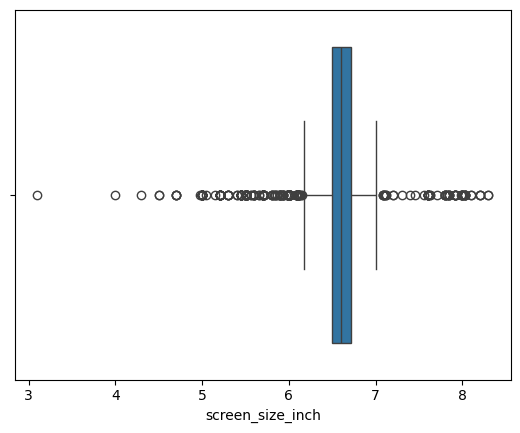

In [252]:
sns.boxplot(df, x = 'screen_size_inch')

In [253]:
df[df['screen_size_inch'] < 5]

name  \
1254         BlackBerry Passport   
1344                Doogee Smini   
1830               Vertu Aster P   
2375                     Cat S60   
2748             Blackview N6000   
2865  Ulefone Armor Mini 20T Pro   
2919             HOMTOM HT20 Pro   
3123       Unihertz Titan Pocket   
3339                Cubot Pocket   
3769       Ulefone Armor Mini 20   

                                                                           link  \
1254         https://www.smartprix.com/mobiles/blackberry-passport-p11011cfs4lu   
1344                https://www.smartprix.com/mobiles/doogee-smini-ppd19pb3woe6   
1830               https://www.smartprix.com/mobiles/vertu-aster-p-ppd1j96fdjuw   
2375                     https://www.smartprix.com/mobiles/cat-s60-p1101tu7l1hi   
2748             https://www.smartprix.com/mobiles/blackview-n6000-ppd1g4v2vjud   
2865  https://www.smartprix.com/mobiles/ulefone-armor-mini-20t-pro-ppd1m6zbn5xq   
2919             https://www.smartprix.com/mobiles/homtom-ht20-pro-ppd1wkhogtd9   
3123       https://www.smartprix.com/mobiles/unihertz-titan-pocket-ppd14689dv9m   
3339                https://www.smartprix.com/mobiles/cubot-pocket-ppd1xakja8rw   
3769       https://www.smartprix.com/mobiles/ulefone-armor-mini-20-ppd116rczqqy   

        price  rating  spec_score processor_brand processor_core  clock_speed  \
1254  23999.0    4.15          61      snapdragon           quad         2.26   
1344  29500.0    4.75          76           helio           octa         2.20   
1830  89900.0    4.15          72      snapdragon           octa         2.20   
2375  24800.0    4.50          60      snapdragon           octa         1.20   
2748  17239.0    4.60          75           helio           octa         2.20   
2865  57000.0    4.75          86       dimensity           octa         2.40   
2919  10170.0    4.00          51           helio           octa         1.30   
3123  22990.0    4.05          65           helio           octa         2.00   
3339   8990.0    4.30          58           tiger           quad         2.00   
3769  24990.0    4.10          85           helio           octa         2.20   

      has_ir  has_nfc  has_5g  ram_gb  rom_gb      brand  \
1254       0        0       0     3.0    32.0     Others   
1344       0        1       0     8.0   256.0     Doogee   
1830       0        0       0     6.0   256.0     Others   
2375       0        1       0     3.0    32.0     Others   
2748       0        1       1     8.0   256.0  Blackview   
2865       1        1       1     8.0   256.0    Ulefone   
2919       0        0       0     3.0    32.0     Others   
3123       1        1       0     6.0   128.0     Others   
3339       0        1       0     4.0    64.0      Cubot   
3769       1        1       0     8.0   256.0    Ulefone   

      battery_capacity_mah  fast_charging_watt  screen_size_inch  \
1254                3450.0                 0.0              4.50   
1344                3000.0                18.0              4.50   
1830                3200.0                 0.0              4.97   
2375                3800.0                 0.0              4.70   
2748                3880.0                18.0              4.30   
2865                6200.0                30.0              4.70   
2919                3500.0                 0.0              4.70   
3123                4000.0                 0.0              3.10   
3339                3000.0                 0.0              4.00   
3769                6200.0                33.0              4.70   

      foldable_display  resolution_width  resolution_height  \
1254                 0            1440.0             1440.0   
1344                 0             480.0             1170.0   
1830                 0            1080.0             1920.0   
2375                 0             720.0             1280.0   
2748                 0             540.0             1200.0   
2865                 0             72

In [254]:
# Above phones are luxury phones. Their relationship between price and specs is very different from the other phones. And also, they are less in number.
# Keeping them does not seem a good idea. so, removing them.
df = df[df['screen_size_inch'] >= 5]

<Axes: ylabel='Density'>

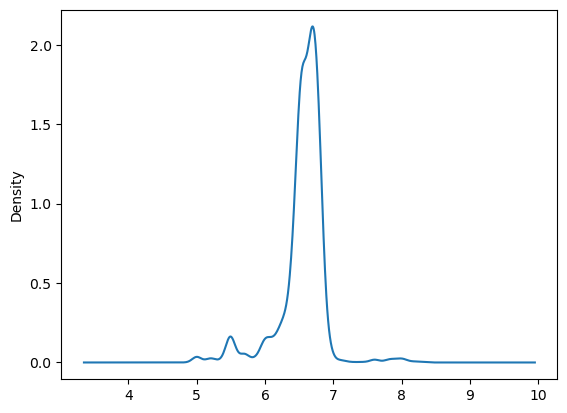

In [255]:
df['screen_size_inch'].plot(kind = 'kde')

In [256]:
df['screen_size_inch'].skew()

-1.0702428499488377

In [257]:
pt = PowerTransformer(method='yeo-johnson')
df['screen_size_transformed'] = pt.fit_transform(df[['screen_size_inch']])
print(pd.Series(df['screen_size_transformed']).skew())

0.3890597209905823


In [258]:
df.columns

Index(['name', 'link', 'price', 'rating', 'spec_score', 'processor_brand',
       'processor_core', 'clock_speed', 'has_ir', 'has_nfc', 'has_5g',
       'ram_gb', 'rom_gb', 'brand', 'battery_capacity_mah',
       'fast_charging_watt', 'screen_size_inch', 'foldable_display',
       'resolution_width', 'resolution_height', 'display_refresh_rate', 'ppi',
       'num_rear_cameras', 'num_front_cameras', 'rear_primary_mp',
       'front_primary_mp', 'expandable_memory_supported',
       'expandable_memory_limit', 'price_group', 'battery_life_group',
       'ram_gb_group', 'screen_type', 'price_transformed',
       'battery_capacity_transformed', 'screen_size_transformed'],
      dtype='object')

In [259]:
# foldable_display

In [260]:
df['foldable_display'].value_counts()

foldable_display
0    3986
1     108
Name: count, dtype: int64

In [261]:
df[df['foldable_display'] == 1]['price'].mean(), df[df['foldable_display'] == 0]['price'].mean()

(98316.12037037036, 24236.82965378826)

In [262]:
df[df['foldable_display'] == 1]

name  \
78                                   Realme Fold   
102   Samsung Galaxy Z Fold 5 (12GB RAM + 512GB)   
113                      Motorola Razr Plus 2025   
121                                Nubia Flip 5G   
134                            Google Pixel Flip   
179                       Motorola Razr 40 Ultra   
193                                Vivo X Fold 5   
236                            Motorola Razr 50s   
309    Samsung Galaxy Z Flip 4 (8GB RAM + 512GB)   
419   Samsung Galaxy Z Fold 4 (12GB RAM + 512GB)   
434                                Vivo X Flip 3   
480                                Vivo X Fold 2   
547                       Tecno Phantom V Fold 3   
554                            OPPO Find N2 Flip   
613                                 OPPO Find N4   
617                         Tecno Phantom V Fold   
652                      Motorola Razr Plus 2023   
659                            Xiaomi Mix Fold 4   
663                               Huawei Mate X5   
742                              Huawei Pocket 3   
786                             OPPO Find N Flip   
791      Tecno Phantom V Fold (12GB RAM + 512GB)   
871                           Motorola Razr Lite   
912                       Motorola Razr 50 Ultra   
943                          Honor Magic Fold 5G   
956                                  Vivo X Flip   
1012                     Motorola Razr Plus 2024   
1043                            Samsung W24 Flip   
1130                           Blackview Hero 10   
1144                                 Samsung W25   
1148                OnePlus Open 5G Apex Edition   
1211                     Samsung Galaxy Z Fold 5   
1216                    Sony Xperia Compact Flip   
1258    Samsung Galaxy Z Fold 4 (12GB RAM + 1TB)   
1363                    Samsung Galaxy Z Flip FE   
1501           Honor Magic V2 RSR Porsche Design   
1513   Samsung Galaxy Z Flip 4 (8GB RAM + 256GB)   
1562                            Royole FlexPai 2   
1616       Samsung Galaxy Z Fold Special Edition   
1661                          Honor Magic V Slim   
1749                     Samsung Galaxy Z Flip 3   
1783                      Tecno Phantom V Flip 2   
1883                    Samsung Galaxy Z Fold FE   
1912                            Motorola Razr 60   
1948                              Nothing Fold 1   
1952                             ZTE Libero Flip   
1972                                 Samsung W24   
1990                        Infinix Zero Flip 5G   
2092                  Samsung Galaxy Z Flip 4 5G   
2104                            Honor Magic Vs 2   
2114                    Sony Xperia Compact fold   
2206                           OPPO Find N3 Flip   
2220                               Honor V Purse   
2256                           OnePlus Open 2 5G   
2309                     Samsung Galaxy Z Flip 7   
2373                      Tecno Phantom V Flip 3   
2383  Samsung Galaxy Z Fold 6 (12GB RAM + 512GB)   
2455                               Vivo X Flip 2   
2460                        Tecno Phantom V Yoga   
2465                              Vivo X Fold 5G   
2500                           Xiaomi Mix Flip 2   
2504                            Honor Magic Flip   
2524                     Samsung Galaxy Z Fold 6   
2531                               Vivo X Fold 3   
2541                 Motorola Razr 40 Ultra 2024   
2578                               Vivo X Fold S   
2696                     Motorola Razr 50s Ultra   
2711                             Nubia Flip 2 5G   
2767                            Samsung W25 Flip   
2772                     Samsung Galaxy Z Fold 4   
2872                     Samsung Galaxy Z Fold 7   
2873                  Samsung Galaxy Z Flip 6 5G   
2901                               Vivo X Fold 4   
2939                              Huawei Mate X6   
2947               Samsung Galaxy Z Fold 6 Ultra   
2971    Samsung Galaxy Z Fold 5 (12GB RAM + 1TB)   
3001                              Honor 

In [263]:
# We can see that 'foldable_display' phones are much expensive than the normal display phones.
# So, this feature will be very valuable in predicting the price.
# Since, the goal is to make the model suitable for expensive phones too, therefore keeping these outliers.

In [264]:
# display_refresh_rate

In [265]:
df['display_refresh_rate'].value_counts()

display_refresh_rate
120.0    2078
90.0     1747
144.0     215
165.0      41
240.0       8
185.0       5
Name: count, dtype: int64

In [266]:
df[df['display_refresh_rate'] == 185]['price'].mean(), df[df['display_refresh_rate'] == 240]['price'].mean()

(97390.0, 79244.5)

In [267]:
# We can see that the above outliers are playing an important role in price of the smartphone. So, keeping them.

In [268]:
# ppi

<Axes: xlabel='ppi'>

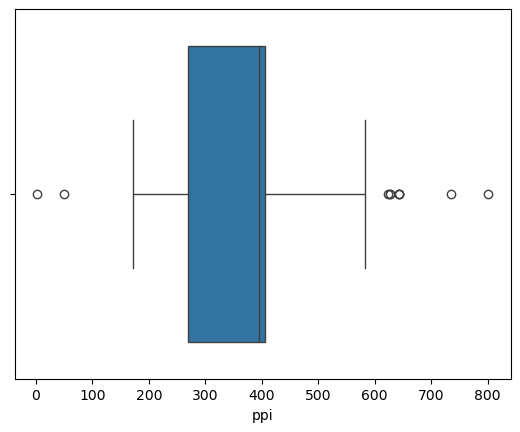

In [269]:
sns.boxplot(df, x = 'ppi')

In [270]:
df[df['ppi'] < 100]

name  \
252                  TCL L7   
2397  Honor Play 30 Plus 5G   

                                                                      link  \
252                  https://www.smartprix.com/mobiles/tcl-l7-ppd12wlmnog5   
2397  https://www.smartprix.com/mobiles/honor-play-30-plus-5g-ppd1jik7jq2g   

        price  rating  spec_score processor_brand processor_core  clock_speed  \
252    5599.0    4.75          48           helio           quad          1.3   
2397  12990.0    4.20          62       dimensity           octa          2.2   

      has_ir  has_nfc  has_5g  ram_gb  rom_gb  brand  battery_capacity_mah  \
252        0        0       0     2.0    32.0    TCL                3000.0   
2397       0        0       1     4.0   128.0  Honor                5000.0   

      fast_charging_watt  screen_size_inch  foldable_display  \
252                  0.0              5.50                 0   
2397                 5.0              6.74                 0   

      resolution_width  resolution_height  display_refresh_rate    ppi  \
252              120.0              240.0                  90.0  48.79   
2397             720.0             1600.0                  90.0   2.44   

      num_rear_cameras  num_front_cameras  rear_primary_mp  front_primary_mp  \
252                  1                  1                8                 5   
2397                 2                  1               13                 5   

      expandable_memory_supported  expandable_memory_limit  price_group  \
252                             1                     32.0            0   
2397                            1                    512.0            3   

      battery_life_group  ram_gb_group screen_type  price_transformed  \
252                    0             0         LCD          -2.092565   
2397                   2             1         LCD          -0.468059   

      battery_capacity_transformed  screen_size_transformed  
252                      -2.815410                -2.691296  
2397                      0.198244                 0.517358

In [271]:
# Index 252 is an old phone. So, going to remove it.
# At index 2397,the ppi value is a data error. So, correcting it.
df.loc[2397, 'ppi'] = 270

In [272]:
df[df['ppi'] > 600]

name  \
147           Sony Xperia Z5 Premium Dual   
1022                   Realme GT 6 Pro 5G   
1109                 Sony Xperia Pro-I II   
1533                    Sony Xperia Pro-I   
2257                             Nokia 10   
2648  Sony Xperia 1 IV (12GB RAM + 512GB)   
3213                      Realme GT 8 Pro   
3380                      Sony Xperia 1 V   

                                                                                link  \
147       https://www.smartprix.com/mobiles/sony-xperia-z5-premium-dual-p11016qll4pg   
1022               https://www.smartprix.com/mobiles/realme-gt-6-pro-5g-ppd1i9yt0f56   
1109             https://www.smartprix.com/mobiles/sony-xperia-pro-i-ii-ppd1pguyfdwj   
1533                https://www.smartprix.com/mobiles/sony-xperia-pro-i-ppd1td553fy3   
2257                         https://www.smartprix.com/mobiles/nokia-10-p1101q4nhv9n   
2648  https://www.smartprix.com/mobiles/sony-xperia-1-iv-12gb-ram-512gb-ppd1xo1j2qfq   
3213                  https://www.smartprix.com/mobiles/realme-gt-8-pro-ppd131nedv41   
3380                  https://www.smartprix.com/mobiles/sony-xperia-1-v-ppd13js68g4o   

         price  rating  spec_score processor_brand processor_core  \
147    18999.0    4.40          66      snapdragon           octa   
1022   49990.0    4.10          83      snapdragon           octa   
1109  139990.0    4.20          93      snapdragon           octa   
1533  134999.0    4.30          90      snapdragon           octa   
2257   38990.0    4.65          75      snapdragon           octa   
2648   90999.0    4.35          91      snapdragon           octa   
3213   59990.0    4.35          88      snapdragon           octa   
3380  125990.0    4.15          91      snapdragon           octa   

      clock_speed  has_ir  has_nfc  has_5g  ram_gb  rom_gb   brand  \
147      1.500000       0        1       0     3.0    32.0    Sony   
1022     2.613946       1        1       1    12.0   512.0  Realme   
1109     3.200000       0        1       1    12.0   512.0    Sony   
1533     2.840000       0        1       1    12.0   512.0    Sony   
2257     2.450000       0        0       0     6.0   128.0   Nokia   
2648     3.000000       0        1       1    12.0   512.0    Sony   
3213     2.613946       1        1       1    12.0   512.0  Realme   
3380     3.200000       0        1       1    12.0   256.0    Sony   

      battery_capacity_mah  fast_charging_watt  screen_size_inch  \
147                 3430.0                 0.0              5.50   
1022                6000.0               120.0              6.78   
1109                4700.0                66.0              6.67   
1533                4500.0                30.0              6.50   
2257                4000.0                 0.0              6.00   
2648                5000.0                30.0              6.50   
3213                8000.0               320.0              6.82   
3380                5000.0                30.0              6.50   

      foldable_display  resolution_width  resolution_height  \
147                  0            2160.0             3840.0   
1022                 0            1864.0             3820.0   
1109                 0            1644.0             3840.0   
1533                 0            1644.0             3840.0   
2257                 0            2160.0             3840.0   
2648                 0            1644.0             3840.0   
3213                 0            1864.0             3820.0   
3380                 0            1644.0             3840.0   

      display_refresh_rate     ppi  num_rear_cameras  num_front_cameras  \
147                  120.0  801.06                 1                  1   
1022                 165.0  626.92                 3                  1   
1109                 120.0  626.25                 3                  1   
1533                 120.0  642.63                 3                  1   
2257                 120.0  7

In [273]:
# Apart from the first phone at index 147, the other phones seem relatively new and have relevant relationship between specs and price while the pone at index 147 is discontinued. So, going to remove it.
df.drop(index = [252, 147], inplace = True)

<Axes: xlabel='ppi'>

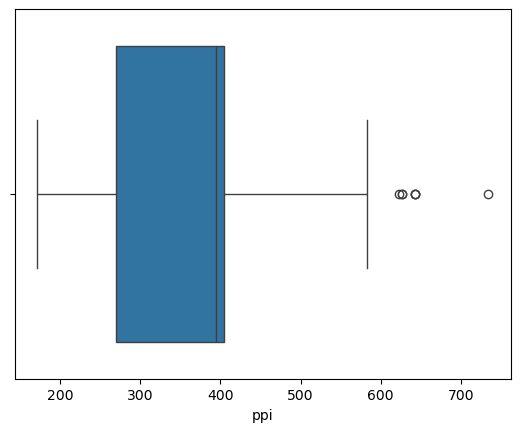

In [274]:
sns.boxplot(df, x = 'ppi')

<Axes: ylabel='Density'>

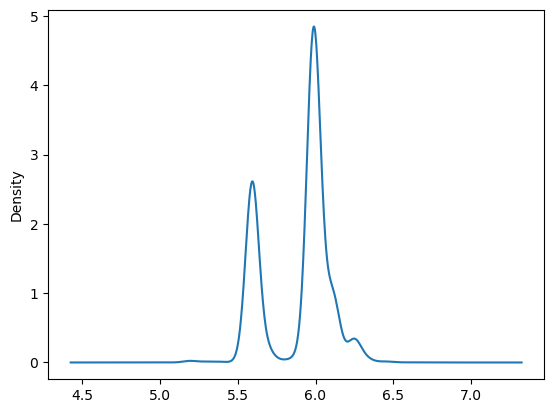

In [275]:
np.log1p(df['ppi']).plot(kind = 'kde')

In [276]:
df['ppi'].skew()

-0.1659209158193316

In [277]:
df.columns

Index(['name', 'link', 'price', 'rating', 'spec_score', 'processor_brand',
       'processor_core', 'clock_speed', 'has_ir', 'has_nfc', 'has_5g',
       'ram_gb', 'rom_gb', 'brand', 'battery_capacity_mah',
       'fast_charging_watt', 'screen_size_inch', 'foldable_display',
       'resolution_width', 'resolution_height', 'display_refresh_rate', 'ppi',
       'num_rear_cameras', 'num_front_cameras', 'rear_primary_mp',
       'front_primary_mp', 'expandable_memory_supported',
       'expandable_memory_limit', 'price_group', 'battery_life_group',
       'ram_gb_group', 'screen_type', 'price_transformed',
       'battery_capacity_transformed', 'screen_size_transformed'],
      dtype='object')

In [278]:
# num_rear_cameras and num_front_cameras

In [279]:
df['num_rear_cameras'].value_counts()

num_rear_cameras
3    1776
2    1463
4     465
1     388
Name: count, dtype: int64

In [280]:
df['num_front_cameras'].value_counts()

num_front_cameras
1    3968
2     116
0       8
Name: count, dtype: int64

In [281]:
# All phones have rear cameras but 8 phones don't have front camera

In [282]:
# rear_primary_mp and front_primary_mp

<Axes: xlabel='rear_primary_mp'>

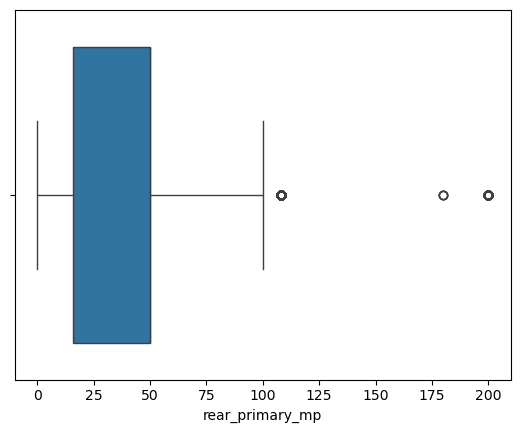

In [283]:
sns.boxplot(df, x = 'rear_primary_mp')

In [284]:
df[df['rear_primary_mp'] > 100].shape

(351, 35)

In [285]:
df[df['rear_primary_mp'] > 150].shape

(93, 35)

In [286]:
df[df['rear_primary_mp'] > 150]

name  \
10                                  Samsung Galaxy S25 Edge   
19                                           Doogee V30 Pro   
45                            Honor 90 5G (12GB RAM +512GB)   
69                                    Xiaomi Redmi Note 14S   
123                                       Honor Magic 7 Pro   
130                                       Doogee V Max Plus   
138                                    Xiaomi Redmi Note 16   
144                              Motorola Moto Edge X30 Pro   
166                        Honor Magic 7 RSR Porsche Design   
168             Samsung Galaxy S25 Ultra (12GB RAM + 512GB)   
186                         Xiaomi Redmi Note 13 Pro Max 5G   
191                                       Black Shark 7 Pro   
193                                           Vivo X Fold 5   
235                                   Motorola Moto X30 Pro   
265                                  Honor Magic 6 Ultimate   
297                                      Realme 11 Pro Plus   
575               Samsung Galaxy S24 Ultra (12GB RAM + 1TB)   
629                                   Nokia Oxygen Ultra 5G   
795                                  Motorola Edge 30 Ultra   
885                         Samsung Galaxy Note 30 Ultra 5G   
1003       Xiaomi Redmi Note 13 Pro Plus (12GB RAM + 512GB)   
1026                                           Vivo V26 Pro   
1031                                            iQOO 13 Pro   
1101                                  Blackview Shark 8 Pro   
1136                                     Vivo X110 Pro Plus   
1144                                            Samsung W25   
1318                                        Vivo X100 Ultra   
1475                                              Honor 400   
1547                                      Honor Magic 6 Pro   
1586                            Xiaomi Redmi Note 13 Pro 5G   
1616                  Samsung Galaxy Z Fold Special Edition   
1659                               Samsung Galaxy S25 Ultra   
1680                                 Unihertz Tank 3 Pro 5G   
1845                                            Realme GT 4   
1861                                           Nokia N73 5G   
1905       Xiaomi Redmi Note 13 Pro Plus (12GB RAM + 256GB)   
1917                                Samsung Galaxy S25 Slim   
1930                                     Vivo X100 Pro Plus   
1982                                               Meizu 22   
2031            Samsung Galaxy S23 Ultra (12GB RAM + 512GB)   
2103                                  Apple iPhone 16 Ultra   
2145                                 Ulefone Armor 26 Ultra   
2148                                      Honor 80 Pro Plus   
2168                                        Vivo X200 Ultra   
2223                                      Infinix GT 30 Pro   
2269                       Xiaomi Redmi Note 13 Pro Plus 5G   
2450                               Samsung Galaxy S24 Ultra   
2494                                     Infinix Zero Ultra   
2534       Xiaomi Redmi Note 12 Pro Plus (12GB RAM + 256GB)   
2546                                               Meizu 21   
2557                                 Motorola Edge 60 Ultra   
2562                                        Xiaomi Mi Mix 5   
2596                            Xiaomi Redmi Note 13 Pro 4G   
2602                          Xiaomi Redmi Note 15 Pro Plus   
2623                                       Vivo X300 Pro 5G   
2645                                           Nokia X60 5G   
2724          Xiaomi Redmi Note 13 Pro 5G (8GB RAM + 256GB)   
2742                                         OnePlus 13 Pro   
2759              Motorola Edge 30 Ultra (12GB RAM + 256GB)   
2812                                       Vivo X200 Pro 5G   
2818                          Xiaomi Redmi Note 12 Explorer   
2872                                Samsung Galaxy Z Fold 7   
2947                          Samsung Galaxy Z Fold 6 Ultra   
2976                   

In [287]:
df['rear_primary_mp'].value_counts()

rear_primary_mp
50     1610
13      582
64      518
48      467
108     258
16      164
12      124
8       122
200      89
20       28
32       27
100      26
5        18
2        12
24       10
21        8
3         7
180       4
25        4
54        3
40        3
23        2
18        2
7         1
1         1
60        1
0         1
Name: count, dtype: int64

In [288]:
# Two data errors found. So, correcting them.
df.loc[df['rear_primary_mp'] == 1, 'rear_primary_mp'] = 13.1
df.loc[df['rear_primary_mp'] == 7, 'rear_primary_mp'] = 20.7

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13392\1269210548.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['rear_primary_mp'] == 1, 'rear_primary_mp'] = 13.1


In [289]:
df['rear_primary_mp'].value_counts()

rear_primary_mp
50.0     1610
13.0      582
64.0      518
48.0      467
108.0     258
16.0      164
12.0      124
8.0       122
200.0      89
20.0       28
32.0       27
100.0      26
5.0        18
2.0        12
24.0       10
21.0        8
3.0         7
180.0       4
25.0        4
54.0        3
40.0        3
23.0        2
18.0        2
20.7        1
13.1        1
60.0        1
0.0         1
Name: count, dtype: int64

In [290]:
df['front_primary_mp'].value_counts()

front_primary_mp
16    1061
8     1024
32     677
5      486
50     215
13     214
20     112
12     108
10      53
25      25
44      22
24      21
60      15
0       12
2       11
40       7
48       6
1        5
42       4
6        4
3        3
9        2
7        2
28       1
4        1
26       1
Name: count, dtype: int64

In [291]:
df[df['front_primary_mp'] == 4]

name                                                        link  \
3025  Xiaomi Mi 5  https://www.smartprix.com/mobiles/xiaomi-mi-5-p1101lhueq2n   

        price  rating  spec_score processor_brand processor_core  clock_speed  \
3025  10000.0     4.3          58      snapdragon           quad          1.8   

      has_ir  has_nfc  has_5g  ram_gb  rom_gb   brand  battery_capacity_mah  \
3025       0        1       0     3.0    32.0  Xiaomi                3000.0   

      fast_charging_watt  screen_size_inch  foldable_display  \
3025                 0.0              5.15                 0   

      resolution_width  resolution_height  display_refresh_rate     ppi  \
3025            1080.0             1920.0                  90.0  427.75   

      num_rear_cameras  num_front_cameras  rear_primary_mp  front_primary_mp  \
3025                 1                  1             16.0                 4   

      expandable_memory_supported  expandable_memory_limit  price_group  \
3025                            0                      0.0            2   

      battery_life_group  ram_gb_group screen_type  price_transformed  \
3025                   0             0         LCD          -0.921589   

      battery_capacity_transformed  screen_size_transformed  
3025                      -2.81541                -3.366686

In [292]:
# Removig the above old phone
df.drop(index = 3025, inplace = True)

In [293]:
df[df['front_primary_mp'] == 7]

name  \
1351  Apple iPhone XS Max   
3105      Huawei Pocket 2   

                                                                    link  \
1351  https://www.smartprix.com/mobiles/apple-iphone-xs-max-ppd13pwn5oww   
3105      https://www.smartprix.com/mobiles/huawei-pocket-2-ppd18hdzvz0g   

        price  rating  spec_score processor_brand processor_core  clock_speed  \
1351  55994.0    4.15          70          bionic           hexa     2.490000   
3105  92990.0    4.45          83           kirin           octa     2.464194   

      has_ir  has_nfc  has_5g  ram_gb  rom_gb   brand  battery_capacity_mah  \
1351       0        1       0     4.0    64.0   Apple                3174.0   
3105       0        1       0    12.0   256.0  Huawei                4520.0   

      fast_charging_watt  screen_size_inch  foldable_display  \
1351                 0.0              6.50                 0   
3105                66.0              6.94                 1   

      resolution_width  resolution_height  display_refresh_rate     ppi  \
1351            2688.0             1242.0                 120.0  455.55   
3105            1136.0             2690.0                 120.0  420.75   

      num_rear_cameras  num_front_cameras  rear_primary_mp  front_primary_mp  \
1351                 2                  1             12.0                 7   
3105                 4                  1             50.0                 7   

      expandable_memory_supported  expandable_memory_limit  price_group  \
1351                            0                      0.0            8   
3105                            1                    512.0            9   

      battery_life_group  ram_gb_group   screen_type  price_transformed  \
1351                   0             1  SUPER AMOLED           1.412542   
3105                   1             3          OLED           1.866688   

      battery_capacity_transformed  screen_size_transformed  
1351                     -2.434290                -0.212577  
3105                     -0.324361                 1.169426

In [294]:
# There is a data error in index 3105, so correcting it.
df.loc[3105, 'front_primary_mp'] = 10.7

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13392\3410852323.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.7' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[3105, 'front_primary_mp'] = 10.7


In [295]:
df[df['front_primary_mp'] == 3]

name  \
87    Sharp Aquos R9 Pro   
1194        Itel A24 Pro   
1313      Sharp Aquos R9   

                                                                   link  \
87    https://www.smartprix.com/mobiles/sharp-aquos-r9-pro-ppd1fg8k9elp   
1194        https://www.smartprix.com/mobiles/itel-a24-pro-ppd1fxzoqos0   
1313      https://www.smartprix.com/mobiles/sharp-aquos-r9-ppd1wgcwwdyg   

         price  rating  spec_score processor_brand processor_core  \
87    103990.0    4.40          95      snapdragon           octa   
1194    5990.0    4.10          44          unisoc           quad   
1313   48999.0    4.45          89      snapdragon           octa   

      clock_speed  has_ir  has_nfc  has_5g  ram_gb  rom_gb  brand  \
87            3.0       0        1       1    12.0   512.0  Sharp   
1194          1.4       0        0       0     2.0    32.0   Itel   
1313          2.8       0        1       1    12.0   256.0  Sharp   

      battery_capacity_mah  fast_charging_watt  screen_size_inch  \
87                  5000.0                 0.0               6.7   
1194                3020.0                 0.0               5.0   
1313                5000.0                 0.0               6.5   

      foldable_display  resolution_width  resolution_height  \
87                   0            1440.0             3120.0   
1194                 0             854.0              480.0   
1313                 0            1080.0             2340.0   

      display_refresh_rate     ppi  num_rear_cameras  num_front_cameras  \
87                   240.0  512.88                 3                  1   
1194                  90.0  195.93                 1                  1   
1313                 240.0  396.49                 2                  1   

      rear_primary_mp  front_primary_mp  expandable_memory_supported  \
87                3.0               3.0                            1   
1194              2.0               3.0                            1   
1313              3.0               3.0                            1   

      expandable_memory_limit  price_group  battery_life_group  ram_gb_group  \
87                      256.0            9                   2             3   
1194                   1024.0            0                   0             0   
1313                   1024.0            8                   2             3   

     screen_type  price_transformed  battery_capacity_transformed  \
87          OLED           1.956151                      0.198244   
1194         LCD          -1.943433                     -2.769802   
1313        OLED           1.278692                      0.198244   

      screen_size_transformed  
87                   0.391781  
1194                -3.628875  
1313                -0.212577

In [296]:
df.loc[[87, 1313], 'front_primary_mp'] = 50.7
df.drop(index = 1194, inplace = True)

In [297]:
df[df['front_primary_mp'] == 6]

name  \
217   Sharp Aquos R8 Pro   
1153       Leitz Phone 1   
1349       Leitz Phone 2   
1820       Leitz Phone 3   

                                                                   link  \
217   https://www.smartprix.com/mobiles/sharp-aquos-r8-pro-ppd141lhvpnf   
1153       https://www.smartprix.com/mobiles/leitz-phone-1-ppd1ldrl612c   
1349       https://www.smartprix.com/mobiles/leitz-phone-2-ppd1kv3tsiy8   
1820       https://www.smartprix.com/mobiles/leitz-phone-3-ppd18sqio6wv   

         price  rating  spec_score processor_brand processor_core  \
217    45990.0    4.40          87      snapdragon           octa   
1153  114999.0    4.30          86      snapdragon           octa   
1349  124990.0    4.55          89      snapdragon           octa   
1820  134999.0    4.30          89      snapdragon           octa   

      clock_speed  has_ir  has_nfc  has_5g  ram_gb  rom_gb   brand  \
217          3.20       0        1       1     8.0   256.0   Sharp   
1153         2.84       0        1       1    12.0   256.0  Others   
1349         3.00       0        1       1    12.0   256.0  Others   
1820         3.20       0        1       1    12.0   512.0  Others   

      battery_capacity_mah  fast_charging_watt  screen_size_inch  \
217                 5000.0                 0.0               6.6   
1153                5000.0                 0.0               6.6   
1349                5000.0                 0.0               6.6   
1820                5000.0                 0.0               6.6   

      foldable_display  resolution_width  resolution_height  \
217                  0            1260.0             2730.0   
1153                 0            1260.0             2730.0   
1349                 0            1260.0             2730.0   
1820                 0            1260.0             2730.0   

      display_refresh_rate     ppi  num_rear_cameras  num_front_cameras  \
217                  240.0  455.57                 2                  1   
1153                 240.0  455.57                 1                  1   
1349                 240.0  455.57                 2                  1   
1820                 240.0  455.57                 2                  1   

      rear_primary_mp  front_primary_mp  expandable_memory_supported  \
217               2.0               6.0                            1   
1153              2.0               6.0                            1   
1349              2.0               6.0                            1   
1820              2.0               6.0                            1   

      expandable_memory_limit  price_group  battery_life_group  ram_gb_group  \
217                    1024.0            8                   2             3   
1153                   1024.0            9                   2             3   
1349                   1024.0            9                   2             3   
1820                   1024.0            9                   2             3   

     screen_type  price_transformed  battery_capacity_transformed  \
217         OLED           1.212845                      0.198244   
1153        OLED           2.033662                      0.198244   
1349        OLED           2.095749                      0.198244   
1820        OLED           2.151532                      0.198244   

      screen_size_transformed  
217                  0.084743  
1153                 0.084743  
1349                 0.084743  
1820                 0.084743

In [298]:
# All three rows above have data errors. So, correcting them
df.loc[[217, 1153, 1349, 1820], 'front_primary_mp'] = 12.6

In [299]:
df[df['front_primary_mp'] == 9]

name  \
1069         Samsung Galaxy Note 2 (N7100)   
2350  Samsung Galaxy Mega 6.3 I9200 (16GB)   

                                                                            link  \
1069         https://www.smartprix.com/mobiles/samsung-galaxy-note-2-n7100-p2164   
2350  https://www.smartprix.com/mobiles/samsung-galaxy-mega-6-3-i9200-16gb-p2882   

       price  rating  spec_score processor_brand processor_core  clock_speed  \
1069  9500.0     4.2          52           helio           quad          1.6   
2350  8999.0     4.1          49      snapdragon           dual          1.7   

      has_ir  has_nfc  has_5g  ram_gb  rom_gb    brand  battery_capacity_mah  \
1069       0        1       0     2.0    16.0  Samsung                3100.0   
2350       0        1       0     1.5    16.0  Samsung                3200.0   

      fast_charging_watt  screen_size_inch  foldable_display  \
1069                 0.0               5.5                 0   
2350                 0.0               6.3                 0   

      resolution_width  resolution_height  display_refresh_rate     ppi  \
1069             720.0             1280.0                  90.0  267.02   
2350             720.0             1280.0                  90.0  233.11   

      num_rear_cameras  num_front_cameras  rear_primary_mp  front_primary_mp  \
1069                 1                  1              8.0               9.0   
2350                 1                  1              8.0               9.0   

      expandable_memory_supported  expandable_memory_limit  price_group  \
1069                            1                     64.0            1   
2350                            1                     64.0            1   

      battery_life_group  ram_gb_group   screen_type  price_transformed  \
1069                   0             0  SUPER AMOLED          -1.015615   
2350                   0             0           LCD          -1.116825   

      battery_capacity_transformed  screen_size_transformed  
1069                     -2.592145                -2.691296  
2350                     -2.380231                -0.778802

In [300]:
# Removing the above two old phones
df.drop(index = [1069, 2350], inplace = True)

In [301]:
df[df['front_primary_mp'] == 1]

name  \
1226                     Samsung Galaxy F44   
1552                     Google Pixel 6 Pro   
1668  Google Pixel 6 Pro (12GB RAM + 256GB)   
1682                             LG G Flex2   
4063  Google Pixel 6 Pro (12GB RAM + 512GB)   

                                                                                  link  \
1226                 https://www.smartprix.com/mobiles/samsung-galaxy-f44-ppd1kuzny6rj   
1552                 https://www.smartprix.com/mobiles/google-pixel-6-pro-ppd1vu4xk9so   
1668  https://www.smartprix.com/mobiles/google-pixel-6-pro-12gb-ram-256gb-ppd1n7bnclaq   
1682                         https://www.smartprix.com/mobiles/lg-g-flex2-p1101j1fjueb   
4063  https://www.smartprix.com/mobiles/google-pixel-6-pro-12gb-ram-512gb-ppd1flrjfavp   

        price  rating  spec_score processor_brand processor_core  clock_speed  \
1226  24990.0    4.70          75          exynos           octa     2.837037   
1552  33999.0    4.75          88          tensor           octa     2.800000   
1668  53950.0    4.70          89          tensor           octa     2.800000   
1682  18999.0    4.50          61      snapdragon           octa     2.000000   
4063  65000.0    4.20          90          tensor           octa     2.800000   

      has_ir  has_nfc  has_5g  ram_gb  rom_gb    brand  battery_capacity_mah  \
1226       0        1       1     8.0   128.0  Samsung                5000.0   
1552       0        1       1    12.0   128.0   Google                5003.0   
1668       0        1       1    12.0   256.0   Google                5003.0   
1682       0        1       0     2.0    32.0       LG                3000.0   
4063       0        1       1    12.0   512.0   Google                5003.0   

      fast_charging_watt  screen_size_inch  foldable_display  \
1226                25.0              6.67                 0   
1552                30.0              6.71                 0   
1668                30.0              6.71                 0   
1682                 0.0              5.50                 0   
4063                30.0              6.71                 0   

      resolution_width  resolution_height  display_refresh_rate     ppi  \
1226            1080.0             2408.0                 120.0  395.67   
1552            1440.0             3120.0                 120.0  512.11   
1668            1440.0             3120.0                 120.0  512.11   
1682            1080.0             1920.0                 120.0  400.53   
4063            1440.0             3120.0                 120.0  512.11   

      num_rear_cameras  num_front_cameras  rear_primary_mp  front_primary_mp  \
1226                 3                  1             64.0               1.0   
1552                 3                  1             50.0               1.0   
1668                 3                  1             50.0               1.0   
1682                 1                  1             13.0               1.0   
4063                 3                  1             50.0               1.0   

      expandable_memory_supported  expandable_memory_limit  price_group  \
1226                            1                   1024.0            6   
1552                            0                      0.0            8   
1668                            0                      0.0            8   
1682                            1                   2048.0            5   
4063                            0                      0.0            9   

      battery_life_group  ram_gb_group screen_type  price_transformed  \
1226                   2             3         LCD           0.496367   
1552                   2             3        OLED           0.877554   
1668                   2             3        OLED           1.375884   
1682                   0             0        OLED           0.119699   
4063                   2             3        OLED           1.554749   

      battery_capacity_transformed  scre

In [302]:
# Dropping an old phone and correcting some data errors
df.drop(index = 1682, inplace = True)
df.loc[[1552, 1668, 4063], 'front_primary_mp'] = 11.1
df.loc[1226, 'front_primary_mp'] = 16

In [303]:
df[df['front_primary_mp'] == 5]

name  \
12                        Xiaomi Redmi 10A Sport   
17                                  Oukitel WP32   
20                      Poco C3 (4GB RAM + 64GB)   
29                                     Honor X6s   
32                          Xiaomi Redmi A2 Plus   
35                             Realme Note 60 5G   
40                               Vernee Mars Pro   
44                                      iKall Z2   
55          Xiaomi Redmi A4 5G (4GB RAM + 128GB)   
56                            Samsung Galaxy A03   
74                                  Itel A58 Pro   
99                           Xiaomi Redmi 9C NFC   
100                                      Vivo G2   
105                            Alcatel 1S (2021)   
120                              Xiaomi Redmi A3   
122                                  TCL L10 Pro   
137                Lava Yuva 3 (4GB RAM + 128GB)   
151                               Tecno Pop 5 Go   
154         Motorola Moto G04 (8 GB RAM + 128GB)   
155                 Realme C30s (4GB RAM + 64GB)   
161                           Xiaomi Redmi 3 Pro   
185          Samsung Galaxy M10 (2GB RAM + 16GB)   
199                              Ulefone Note 14   
210                           Samsung Galaxy A10   
213                             Xiaomi Redmi 11A   
214           Xiaomi Redmi 10A (6GB RAM + 128GB)   
221                                 itel Zeno 10   
231                        Acerone Liquid S162E4   
243                                    OPPO A17K   
267                                Meizu Blue 20   
269                                  Letv Y1 Pro   
271                                ZTE Blade A52   
275                              Oukitel WP5 Pro   
285                        Xiaomi Redmi 10 Power   
307                                  Realme C51s   
311                                    Vivo Y71i   
322                                   Gionee K10   
325              Xiaomi Redmi 5 (3GB RAM + 32GB)   
335                            Realme Note 60 4G   
337                               Google Pixel 9   
342                          Xiaomi Redmi 13C 5G   
345                                  Vivo Y35 5G   
366                  Realme C33 (4GB RAM + 64GB)   
367                                     Vivo Y16   
370                                Realme V20 5G   
372     Samsung Galaxy M01 Core (2GB RAM + 32GB)   
376   Xiaomi Redmi 11 Prime 5G (6GB RAM + 128GB)   
377                                itel A05s New   
396            Xiaomi Redmi 10 (8GB RAM + 128GB)   
402                                      Lava X3   
416                              HTC Wildfire E7   
421                             OnePlus 2 (16GB)   
428                                      Lava O3   
437                                 Honor X5B 4G   
438                                     POCO C31   
441                              Huawei Honor 8S   
444                           Samsung Galaxy M01   
445                                  OPPO A3x 5G   
447                                  Poco C75 5G   
449                                   Realme V30   
468                                Honor Play 9C   
471             Xiaomi Redmi 6A (3GB RAM + 32GB)   
481                             Xiaomi Redmi 10C   
492            Xiaomi Redmi 9A (6GB RAM + 128GB)   
493    iBerry Auxus Prime P8000 (Elephone P8000)   
504                 Realme C61 (4GB RAM + 128GB)   
507                          Samsung Galaxy F02s   
510                    POCO C31 (4GB RAM + 64GB)   
516                                    Vivo Y18e   
517                              Coolpad Cool 30   
527         Samsung Galaxy A03s (6GB RAM + 64GB)   
528                             Huawei Y6 (2018)   
557             Xiaomi Redmi 5A (3GB RAM + 32GB)   
570                                   Realme C32   
572                              Tecno Pop 4 LTE   
587                                Vivo Y3s 2021   
589                        Samsung Galax

In [304]:
# Above rows are genuine.

In [305]:
df['front_primary_mp'].skew()

1.2800711353479055

In [306]:
np.log1p(df['front_primary_mp']).skew()

0.045750599129675974

In [307]:
df['rear_primary_mp'].skew()

2.0755943580641083

In [308]:
np.log1p(df['rear_primary_mp']).skew()

-0.6582207778492755

In [309]:
df.columns

Index(['name', 'link', 'price', 'rating', 'spec_score', 'processor_brand',
       'processor_core', 'clock_speed', 'has_ir', 'has_nfc', 'has_5g',
       'ram_gb', 'rom_gb', 'brand', 'battery_capacity_mah',
       'fast_charging_watt', 'screen_size_inch', 'foldable_display',
       'resolution_width', 'resolution_height', 'display_refresh_rate', 'ppi',
       'num_rear_cameras', 'num_front_cameras', 'rear_primary_mp',
       'front_primary_mp', 'expandable_memory_supported',
       'expandable_memory_limit', 'price_group', 'battery_life_group',
       'ram_gb_group', 'screen_type', 'price_transformed',
       'battery_capacity_transformed', 'screen_size_transformed'],
      dtype='object')

In [310]:
df['expandable_memory_supported'].value_counts()

expandable_memory_supported
1    2711
0    1376
Name: count, dtype: int64

In [311]:
df['expandable_memory_limit'].value_counts()

expandable_memory_limit
0.00       1376
1024.00    1272
256.00      663
512.00      412
2048.00     166
128.00      129
64.00        24
32.00        21
1536.00      11
400.00        7
1000.00       4
1044.48       2
Name: count, dtype: int64

In [312]:
df.loc[df['expandable_memory_limit'].isin([1000, 1044.48]), 'expandable_memory_limit'] = 1000

In [313]:
df['expandable_memory_limit'].value_counts()

expandable_memory_limit
0.0       1376
1024.0    1272
256.0      663
512.0      412
2048.0     166
128.0      129
64.0        24
32.0        21
1536.0      11
400.0        7
1000.0       6
Name: count, dtype: int64

In [314]:
# screen_type

In [315]:
df['screen_type'].value_counts()

screen_type
LCD             2164
AMOLED          1116
SUPER AMOLED     442
OLED             357
OTHER              8
Name: count, dtype: int64

In [316]:
# ram_gb revisited

In [317]:
df['ram_gb'].value_counts()

ram_gb
8.0     1351
4.0      936
6.0      767
12.0     548
3.0      225
2.0      152
16.0      79
1.0       15
24.0       9
18.0       4
10.0       1
Name: count, dtype: int64

In [318]:
df[df['ram_gb'] == 1]

name  \
151            Tecno Pop 5 Go   
999                  itel P36   
1065                 itel A57   
1091                 itel A56   
1256  Samsung Galaxy M01 Core   
1276                 Itel A58   
1328                 itel A36   
1979                 itel S17   
2067   Samsung Galaxy A3 Core   
2708   Xiaomi Redmi Go (16GB)   
2714             Atom Maximus   
2777           Tecno Pop 6 Go   
3309                Nokia C10   
3436                 itel S16   
4002                 itel S15   

                                                                        link  \
151            https://www.smartprix.com/mobiles/tecno-pop-5-go-ppd1fo4qla01   
999                  https://www.smartprix.com/mobiles/itel-p36-ppd1mk6o8r4n   
1065                 https://www.smartprix.com/mobiles/itel-a57-ppd1ndc4gy79   
1091                 https://www.smartprix.com/mobiles/itel-a56-ppd1bj86reag   
1256  https://www.smartprix.com/mobiles/samsung-galaxy-m01-core-ppd1luz71zbl   
1276                 https://www.smartprix.com/mobiles/itel-a58-ppd1dcy2oza4   
1328                 https://www.smartprix.com/mobiles/itel-a36-ppd14l9g10zv   
1979                 https://www.smartprix.com/mobiles/itel-s17-ppd1n0muybsr   
2067   https://www.smartprix.com/mobiles/samsung-galaxy-a3-core-ppd1eq7x1wjr   
2708     https://www.smartprix.com/mobiles/xiaomi-redmi-go-16gb-ppd1hxjpsicq   
2714             https://www.smartprix.com/mobiles/atom-maximus-p1101ke6jgym   
2777           https://www.smartprix.com/mobiles/tecno-pop-6-go-ppd1rcb3bad3   
3309                https://www.smartprix.com/mobiles/nokia-c10-ppd1g7ef95fx   
3436                 https://www.smartprix.com/mobiles/itel-s16-ppd1fkh1am6z   
4002                 https://www.smartprix.com/mobiles/itel-s15-ppd12sie05bf   

        price  rating  spec_score processor_brand processor_core  clock_speed  \
151    6999.0    4.15          49           other           quad          1.3   
999    6490.0    4.65          48           other           quad          1.3   
1065   5990.0    4.20          50           other           quad          1.3   
1091   5490.0    4.35          50          unisoc           quad          1.3   
1256   5199.0    4.60          52           helio           quad          1.5   
1276   6299.0    4.05          48          unisoc           quad          1.3   
1328   4990.0    4.60          48          unisoc           quad          1.3   
1979   7999.0    4.15          51          unisoc           quad          1.3   
2067   6290.0    4.25          51          exynos           quad          1.5   
2708   5499.0    4.70          49      snapdragon           quad          1.4   
2714  18900.0    4.60          52           helio           quad          1.5   
2777   6999.0    4.15          49           other           quad          1.3   
3309   6990.0    4.00          50          unisoc           quad          1.3   
3436   5990.0    4.55          52          unisoc           quad          1.3   
4002   5999.0    4.45          53          unisoc           quad          1.6   

      has_ir  has_nfc  has_5g  ram_gb  rom_gb    brand  battery_capacity_mah  \
151        0        0       0     1.0    16.0    Tecno                4000.0   
999        0        0       0     1.0    16.0     Itel                5000.0   
1065       0        0       0     1.0    16.0     Itel                4000.0   
1091       0        0       0     1.0    16.0     Itel                4000.0   
1256       0        0       0     1.0    16.0  Samsung                3000.0   
1276       0        0       0     1.0    16.0     Itel                4000.0   
1328       0        0       0     1.0    16.0     Itel                3020.0   
1979       0        0       0     1.0    16.0     Itel                5000.0   
2067       0        0       0     1.0    16.0  Samsung                3000.0   
2708       0        0       0     1.0    16.0   Xiaomi                3000.0   
2714       0        0       0     1.0 

In [319]:
# upon checking, almost all of the above phones are old and their price is not justified by their specifications. So, dropping them.
# Also, dropping phones with rare ram values like 10, 18 and 24.
df = df[~(df['ram_gb'].isin([1, 10, 18, 24]))]

In [320]:
df.shape

(4058, 35)

In [321]:
df.columns

Index(['name', 'link', 'price', 'rating', 'spec_score', 'processor_brand',
       'processor_core', 'clock_speed', 'has_ir', 'has_nfc', 'has_5g',
       'ram_gb', 'rom_gb', 'brand', 'battery_capacity_mah',
       'fast_charging_watt', 'screen_size_inch', 'foldable_display',
       'resolution_width', 'resolution_height', 'display_refresh_rate', 'ppi',
       'num_rear_cameras', 'num_front_cameras', 'rear_primary_mp',
       'front_primary_mp', 'expandable_memory_supported',
       'expandable_memory_limit', 'price_group', 'battery_life_group',
       'ram_gb_group', 'screen_type', 'price_transformed',
       'battery_capacity_transformed', 'screen_size_transformed'],
      dtype='object')

In [322]:
# Dropping the columns which are not needed anymore.
df.drop(columns = ['price_group', 'battery_life_group', 'ram_gb_group', 'battery_capacity_transformed', 'price_transformed', 'screen_size_transformed', 'resolution_width', 'resolution_height'], inplace = True)

In [323]:
# Exporting the dataframe for its use in recommendation module
df.to_csv("smartphones_data_for_recommendation.csv", index = False)

In [324]:
# Dropping the columns which are not needed for price prediction module.
df.drop(columns = ['name', 'link'], inplace = True)

In [325]:
df.shape

(4058, 25)

In [326]:
df.sample(5)

price  rating  spec_score processor_brand processor_core  clock_speed  \
700   10599.0    4.15          68           helio           octa          2.0   
656   13990.0    4.10          72       dimensity           octa          2.2   
2304  34999.0    4.15          82      snapdragon           octa          3.2   
1136  99990.0    4.45          97      snapdragon           octa          3.3   
2678   8990.0    4.55          60           helio           octa          1.6   

      has_ir  has_nfc  has_5g  ram_gb  rom_gb    brand  battery_capacity_mah  \
700        0        0       0     4.0    64.0  Infinix                5200.0   
656        0        0       1     6.0   128.0    Honor                6000.0   
2304       0        1       1     8.0   128.0    Nubia                5000.0   
1136       1        1       1    12.0   256.0     Vivo                4870.0   
2678       0        0       0     2.0    64.0   Others                5000.0   

      fast_charging_watt  screen_size_inch  foldable_display  \
700                  0.0              6.78                 0   
656                  5.0              6.74                 0   
2304                80.0              6.67                 0   
1136               200.0              6.82                 0   
2678                 0.0              6.52                 0   

      display_refresh_rate     ppi  num_rear_cameras  num_front_cameras  \
700                   90.0  264.17                 4                  1   
656                   90.0  260.32                 2                  1   
2304                 144.0  394.57                 3                  1   
1136                 165.0  514.53                 4                  1   
2678                  90.0  269.10                 2                  1   

      rear_primary_mp  front_primary_mp  expandable_memory_supported  \
700              16.0               8.0                            1   
656              50.0               5.0                            1   
2304             64.0              16.0                            0   
1136            200.0              60.0                            0   
2678             13.0               8.0                            1   

      expandable_memory_limit screen_type  
700                     256.0         LCD  
656                     512.0         LCD  
2304                      0.0      AMOLED  
1136                      0.0      AMOLED  
2678                    512.0         LCD

In [319]:
# Exporting the dataframe for its use in price prediction module
df.to_csv("smartphones_outliers_treated.csv", index = False)